In [27]:
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np
import sys
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# Dimensionality reduction using Keras AutoEncoder

# Method

*Load and read data

*Design autoencoder Model

*Train Auto Encoder

*Use Encoder level from Auto Encoder

*Use Encoder to obtain reduced dimensionality data 

*Use decoder to obtain the reconstructed data 

In [28]:
%matplotlib inline

In [29]:

# read data
der = loadtxt('derivatives_all_epochs.dat')
encoded_train = pd.DataFrame(der)
encoded_train.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,-0.005201,-0.004614,-0.002545,0.000716,0.004247,0.006955,0.008081,0.007484,0.005628,0.003352,...,0.000765,0.000549,0.000332,0.000177,0.000109,0.000097,0.000077,0.000013,-0.000076,-0.000138
1,-0.002207,0.001210,0.005903,0.010225,0.012347,0.011309,0.007464,0.002194,-0.002793,-0.006206,...,0.000372,0.000281,0.000216,0.000190,0.000212,0.000280,0.000371,0.000442,0.000461,0.000428
2,-0.001937,0.001119,0.005535,0.010308,0.013761,0.014488,0.012114,0.007491,0.002269,-0.001912,...,0.000357,0.000294,0.000262,0.000249,0.000242,0.000241,0.000259,0.000304,0.000364,0.000419
3,-0.002083,0.003039,0.007768,0.010512,0.010545,0.008151,0.004267,0.000028,-0.003560,-0.005865,...,0.000216,0.000139,0.000099,0.000118,0.000186,0.000263,0.000304,0.000293,0.000248,0.000189
4,-0.005714,-0.005461,-0.004205,-0.001977,0.000851,0.003718,0.006036,0.007330,0.007360,0.006222,...,0.000113,0.000055,0.000050,0.000063,0.000063,0.000028,-0.000048,-0.000159,-0.000305,-0.000490


In [30]:
#shape of the given data

print('Train data shape', der.shape)
#finding the maximum and the minimum of the data
print('min, max',der.min(),der.max())

Train data shape (3677, 296)
min, max -0.0249818086590043 0.02830322628370948


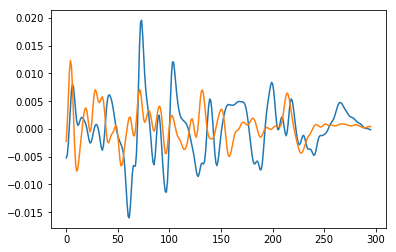

In [31]:
#plotting the first and second columns of the data

_ = plt.plot(der[0,:])
_ = plt.plot(der[1,:])

In [32]:
#Scaling Train for

#train_scaled = minmax_scale(der, axis = 0)
#train_scaled1 = minmax_scale(der, axis = 0)

#print(train_scaled.shape)

In [33]:
#_ = plt.plot(train_scaled[0,:])
#_ = plt.plot(der[0,:]/der[0,:].max())

# Reducing the data to 4 dimensions

In [34]:
# define the number of features
ncol = der.shape[1]

### Define the encoder dimension
encoding_dim = 4
#introducing an activation function
activation = 'sigmoid'
activation2='relu'

### Define  Deep Autoencoder model

In [35]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(128, activation = activation2)(input_dim)
encoded2 = Dense(100, activation = activation2)(encoded1)
encoded3 = Dense(82, activation = activation2)(encoded2)
encoded4 = Dense(74, activation = activation2)(encoded3)
encoded11 = Dense(44, activation = activation2)(encoded4)
encoded12 = Dense(40, activation = activation2)(encoded11)
encoded13= Dense(35, activation = activation2)(encoded12)
encoded14 = Dense(30, activation = activation2)(encoded13)
encoded15 = Dense(24, activation = activation2)(encoded14)
encoded16 = Dense(8, activation = activation2)(encoded15)
encoded18 = Dense(5, activation = activation2)(encoded16)
encoded_middle = Dense(encoding_dim, activation = activation)(encoded18)

# Decoder Layers

decoded0 = Dense(5, activation = activation2)(encoded_middle)
decoded1 = Dense(8, activation = activation2)(decoded0)
decoded2 = Dense(24, activation = activation2)(decoded1)
decoded3 = Dense(30, activation = activation2)(decoded2)
decoded4 = Dense(35, activation = activation2)(decoded3)
decoded5 = Dense(40, activation = activation2)(decoded4)
decoded6 = Dense(44, activation = activation2)(decoded5)
decoded12 = Dense(74, activation = activation2)(decoded6)
decoded13 = Dense(82, activation = activation2)(decoded12)
decoded14 = Dense(100, activation = activation2)(decoded13)
decoded15 = Dense(128, activation = activation2)(decoded14)
decoded_out = Dense(ncol, activation = activation)(decoded15)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded_out)
#
middle  = Model(inputs =input_dim, outputs = encoded_middle)


# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')  #'adadelta--mse'

#
middle.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')     #binary_crossentropy

In [36]:
# summary of the whole autoencoder

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               38016     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_27 (Dense)             (None, 82)                8282      
_________________________________________________________________
dense_28 (Dense)             (None, 74)                6142      
_________________________________________________________________
dense_29 (Dense)             (None, 44)                3300      
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1800      
__________

In [37]:
middle.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               38016     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_27 (Dense)             (None, 82)                8282      
_________________________________________________________________
dense_28 (Dense)             (None, 74)                6142      
_________________________________________________________________
dense_29 (Dense)             (None, 44)                3300      
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1800      
__________

In [38]:
#Split train data into train 
from keras.callbacks import TensorBoard
history=autoencoder.fit(der, der ,nb_epoch = 10)#callbacks=[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=False)]), 
               


/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/10
3677/3677 [==============================] - 3s 795us/step - loss: 0.3554
Epoch 2/10
3677/3677 [==============================] - 2s 447us/step - loss: -0.0019
Epoch 3/10
3677/3677 [==============================] - 2s 458us/step - loss: -0.0037
Epoch 4/10
3677/3677 [==============================] - 2s 477us/step - loss: -0.0041
Epoch 5/10
3677/3677 [==============================] - 2s 471us/step - loss: -0.0042
Epoch 6/10
3677/3677 [==============================] - 2s 466us/step - loss: -0.0042
Epoch 7/10
3677/3677 [==============================] - 2s 469us/step - loss: -0.0043
Epoch 8/10
3677/3677 [==============================] - 2s 478us/step - loss: -0.0043
Epoch 9/10
3677/3677 [==============================] - 2s 469us/step - loss: -0.0043
Epoch 10/10
3677/3677 [==============================] - 2s 473us/step - loss: -0.0043


In [194]:
#reconstructed data

reconstructed = autoencoder.predict(der)
encoded_test = pd.DataFrame(reconstructed)

encoded_test .to_csv('reconstructed4D.csv', index=False)

encoded_test .head()


,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,0.000727,0.002166,0.003288,0.003750,0.003498,0.002654,0.001555,0.000459,8.279484e-08,1.135814e-08,...,0.000302,0.000239,0.000239,0.000236,0.000133,0.000052,0.000089,0.000022,5.949651e-08,0.000004
1,0.000727,0.002166,0.003288,0.003750,0.003498,0.002653,0.001555,0.000459,8.277368e-08,1.135478e-08,...,0.000302,0.000239,0.000239,0.000236,0.000133,0.000052,0.000089,0.000022,5.948062e-08,0.000004
2,0.000727,0.002166,0.003288,0.003750,0.003498,0.002654,0.001555,0.000459,8.279484e-08,1.135814e-08,...,0.000302,0.000239,0.000239,0.000236,0.000133,0.000052,0.000089,0.000022,5.949651e-08,0.000004
3,0.000727,0.002166,0.003288,0.003750,0.003498,0.002653,0.001555,0.000459,8.277257e-08,1.135465e-08,...,0.000302,0.000239,0.000239,0.000236,0.000133,0.000052,0.000089,0.000022,5.947982e-08,0.000004
4,0.000727,0.002166,0.003287,0.003749,0.003497,0.002653,0.001555,0.000459,8.273816e-08,1.134931e-08,...,0.000302,0.000238,0.000239,0.000236,0.000133,0.000052,0.000089,0.000022,5.945465e-08,0.000004


In [197]:

#reduced data 
reduced_data4D=middle.predict(der)
print(reduced_data4D)
encoded_train = pd.DataFrame(reduced_data4D)
encoded_train.head()
encoded_train .to_csv('reduced_to_4D.csv', index=False)
encoded_train.head()

[[0.510272   0.5293577  0.4882581  0.5146692 ]
 [0.5103031  0.5294077  0.48825777 0.51466405]
 [0.5102998  0.5293717  0.48827168 0.5146453 ]
 ...
 [0.5103469  0.5294408  0.48828787 0.5146358 ]
 [0.51028556 0.5293567  0.4882706  0.5146531 ]
 [0.5103703  0.52951235 0.48827615 0.51465386]]


,0,1,2,3
0,0.510272,0.529358,0.488258,0.514669
1,0.510303,0.529408,0.488258,0.514664
2,0.510300,0.529372,0.488272,0.514645
3,0.510295,0.529405,0.488250,0.514671
4,0.510413,0.529523,0.488304,0.514611


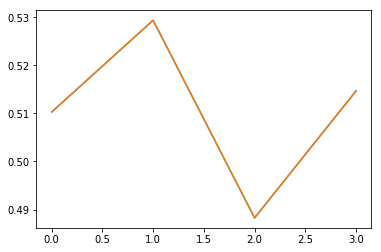

In [41]:
plt.plot(reduced_data4D[0,:])
#
plt.plot(reduced_data4D[2,:])

plt.show()

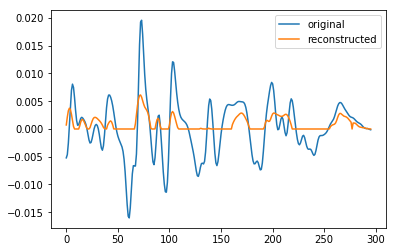

In [42]:
plt.plot(der[0,:],label='original')
plt.plot(reconstructed[0,:],label='reconstructed')
plt.legend()

# DL scatter plot

In [43]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# path to DL results
path_small_space =reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# path to kmeans result
path_kmeans = 'clustering_KMeans_label_4features_4groups.dat'

# color for plotting
c = [ 'green', 'red', 'blue', 'orange']

# markers for ploting
mark =  ['^','o',  's', 'd', '*']


In [44]:
# marker size
ss = [60, 40, 40, 60]

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]

lin2

['#SN, zhelio, MJD, epoch, at_max_flag\n',
 'sn2011fe 0.00080 55835.260 20.870 0\n',
 'sn2011fe 0.00080 55817.710 3.320 0\n',
 'sn2011fe 0.00080 55823.610 9.220 0\n',
 'sn2011fe 0.00080 55811.420 -2.970 1\n',
 'sn2011fe 0.00080 55855.170 40.780 0\n',
 'sn2011fe 0.00080 55807.430 -6.960 0\n',
 'sn2011fe 0.00080 55814.430 0.040 1\n',
 'sn2011fe 0.00080 55841.310 26.920 0\n',
 'sn2011fe 0.00080 55804.250 -10.140 0\n',
 'sn2011fe 0.00080 55801.120 -13.270 0\n',
 'sn2002bo 0.00430 52355.000 -1.693 1\n',
 'sn2002bo 0.00430 52343.000 -13.641 0\n',
 'sn2002bo 0.00430 52354.000 -2.688 1\n',
 'sn2002bo 0.00430 52400.000 43.115 0\n',
 'sn2002bo 0.00430 52385.000 28.179 0\n',
 'sn2002bo 0.00430 52356.000 -0.697 1\n',
 'sn2002bo 0.00430 52352.000 -4.680 0\n',
 'sn2002bo 0.00430 52343.000 -13.641 0\n',
 'sn2002bo 0.00430 52354.000 -2.688 1\n',
 'sn2002bo 0.00430 52395.000 38.136 0\n',
 'sn2002bo 0.00430 52346.000 -10.654 0\n',
 'sn2002bo 0.00430 52351.000 -5.676 0\n',
 'sn2002bo 0.00430 52344.000 -1

In [45]:
names_all[1:]

[['sn2011fe', '0.00080', '55817.710', '3.320', '0'],
 ['sn2011fe', '0.00080', '55823.610', '9.220', '0'],
 ['sn2011fe', '0.00080', '55811.420', '-2.970', '1'],
 ['sn2011fe', '0.00080', '55855.170', '40.780', '0'],
 ['sn2011fe', '0.00080', '55807.430', '-6.960', '0'],
 ['sn2011fe', '0.00080', '55814.430', '0.040', '1'],
 ['sn2011fe', '0.00080', '55841.310', '26.920', '0'],
 ['sn2011fe', '0.00080', '55804.250', '-10.140', '0'],
 ['sn2011fe', '0.00080', '55801.120', '-13.270', '0'],
 ['sn2002bo', '0.00430', '52355.000', '-1.693', '1'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '52400.000', '43.115', '0'],
 ['sn2002bo', '0.00430', '52385.000', '28.179', '0'],
 ['sn2002bo', '0.00430', '52356.000', '-0.697', '1'],
 ['sn2002bo', '0.00430', '52352.000', '-4.680', '0'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '5

No handles with labels found to put in legend.


[[0.51029503 0.52940452 0.48824957 0.51467079]
 [0.51031476 0.52942151 0.48825935 0.51465881]
 [0.51032376 0.52944505 0.48825592 0.51466322]
 ...
 [0.51032859 0.52943432 0.48826617 0.51465112]
 [0.51030034 0.52941513 0.48824486 0.51467049]
 [0.51028556 0.52941513 0.48823014 0.51468706]]


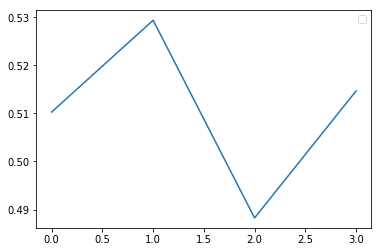

In [46]:
data1 = path_small_space#[elem for elem in ]path_small_space
# matrix at maximum brightness
matrix = np.array([[float(item) for item in data1[i]] for i in range(len(data1)) if names_all[i][-1]=='1'])
encoded_train = pd.DataFrame(matrix)
encoded_train.head()


print(matrix[0:])
plt.plot(matrix[0,:])
plt.legend()

In [47]:

# read DL results
#op1 = open(path_small_space, 'r')
#lin1 = op1.readlines()
#op1.close()


# read kmeans results
op3 = open(path_kmeans, 'r')
lin3 = op3.readlines()
op3.close()
lin3

['3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '1.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '1.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '2.000000000000000000e+00\n',
 '2.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '0.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '3.000000000000000000e+00\n',
 '1.0000

In [48]:
names_all

[['sn2011fe', '0.00080', '55835.260', '20.870', '0'],
 ['sn2011fe', '0.00080', '55817.710', '3.320', '0'],
 ['sn2011fe', '0.00080', '55823.610', '9.220', '0'],
 ['sn2011fe', '0.00080', '55811.420', '-2.970', '1'],
 ['sn2011fe', '0.00080', '55855.170', '40.780', '0'],
 ['sn2011fe', '0.00080', '55807.430', '-6.960', '0'],
 ['sn2011fe', '0.00080', '55814.430', '0.040', '1'],
 ['sn2011fe', '0.00080', '55841.310', '26.920', '0'],
 ['sn2011fe', '0.00080', '55804.250', '-10.140', '0'],
 ['sn2011fe', '0.00080', '55801.120', '-13.270', '0'],
 ['sn2002bo', '0.00430', '52355.000', '-1.693', '1'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '52354.000', '-2.688', '1'],
 ['sn2002bo', '0.00430', '52400.000', '43.115', '0'],
 ['sn2002bo', '0.00430', '52385.000', '28.179', '0'],
 ['sn2002bo', '0.00430', '52356.000', '-0.697', '1'],
 ['sn2002bo', '0.00430', '52352.000', '-4.680', '0'],
 ['sn2002bo', '0.00430', '52343.000', '-13.641', '0'],
 ['sn2002bo', '0.00430', '5

In [49]:
classes = np.array([float(elem.split()[0]) for elem in lin3])
print(classes)
group1 = classes == 0.0
group2 = classes == 1.0
group3 = classes == 2.0
group4 = classes == 3.0

print(len(classes))

[3. 3. 0. 0. 0. 0. 1. 3. 3. 3. 1. 3. 0. 0. 0. 3. 0. 3. 2. 2. 3. 3. 3. 3.
 3. 0. 0. 3. 3. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 2. 3. 1. 3.
 1. 3. 3. 1. 3. 3. 1. 1. 3. 1. 3. 3. 3. 1. 3. 0. 0. 3. 0. 1. 3. 0. 0. 1.
 3. 3. 3. 3. 0. 3. 2. 3. 2. 2. 3. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 2.
 0. 3. 3. 3. 3. 3. 2. 3. 3. 3. 1. 3. 2. 1. 2. 0. 2. 1. 0. 3. 0. 3. 0. 3.
 1. 1. 3. 3. 1. 3. 0. 2. 3. 1. 1. 0. 1. 1. 3. 1. 1. 1. 0. 3. 3. 3. 0. 0.
 3. 3. 3. 1. 3. 0. 3. 0. 3. 3. 1. 3. 3. 0. 0. 0. 0. 0. 3. 0. 3. 0. 1. 3.
 0. 3. 3. 0. 1. 0. 0. 0. 3. 3. 0. 0. 1. 1. 3. 1. 1. 2. 1. 1. 2. 1. 2. 2.
 1. 0. 3. 3. 3. 0. 3. 0. 0. 1. 3. 3. 1. 0. 1. 0. 2. 3. 1. 1. 1. 0. 3. 0.
 3. 3. 3. 1. 3. 0. 0. 0. 0. 3. 1. 0. 1. 0. 1. 3. 1. 0. 3. 0. 0. 1. 3. 3.
 1. 0. 0. 3. 3. 3. 1. 3. 3. 0. 0. 3. 3. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 3.
 3. 0. 1. 1. 3. 0. 2. 0. 1. 0. 3. 3. 1. 1. 1. 3. 3. 3. 1. 0. 3. 3. 1. 0.
 0. 3. 3. 1. 2. 2. 3. 1. 3. 0. 0. 1. 2. 3. 3. 2. 0. 2. 3. 3. 2. 1. 0. 1.
 1. 1. 3. 1. 0. 0. 3. 1. 3. 0. 3. 1. 0. 1. 2. 3. 0.

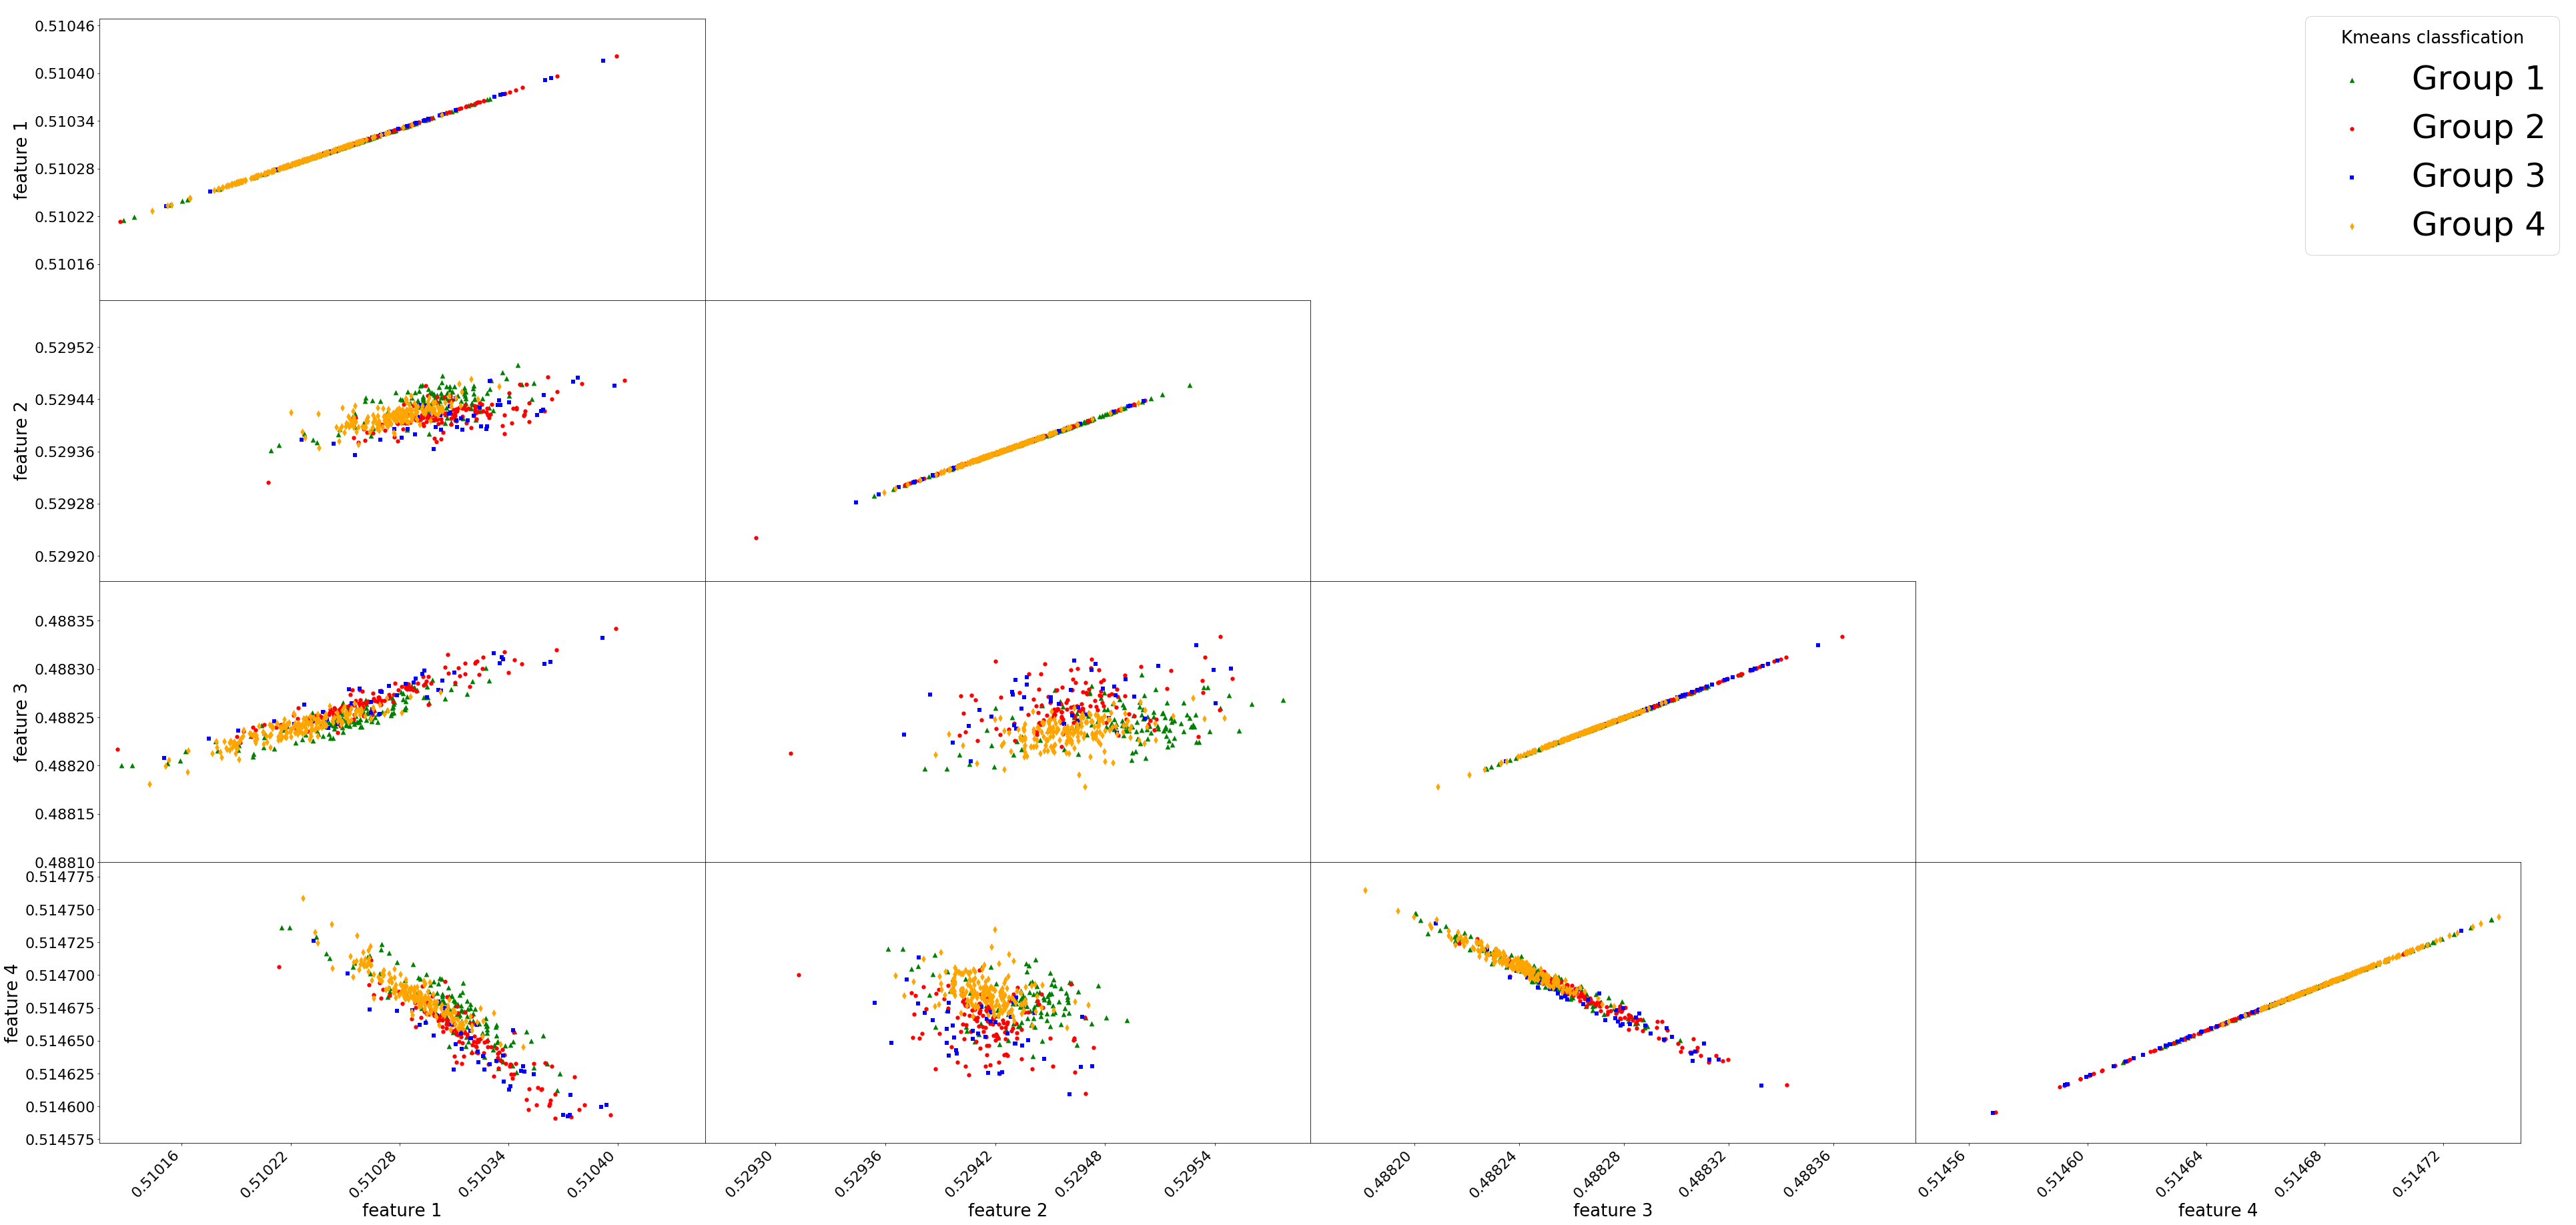

In [220]:
# plot only DL results
fig = plt.figure(figsize=(56,26))
plt.subplot(4,4,1)
panels = []
panels.append(plt.scatter(matrix[group1,0], matrix[group1,0], lw='0',marker=mark[0],s=ss[0], color=c[0]))
panels.append(plt.scatter(matrix[group2,0], matrix[group2,0], lw='0',marker=mark[1],s=ss[1], color=c[1]))
panels.append(plt.scatter(matrix[group3,0], matrix[group3,0], lw='0',marker=mark[2],s=ss[2], color=c[2]))
panels.append(plt.scatter(matrix[group4,0], matrix[group4,0], lw='0',marker=mark[3],s=ss[3], color=c[3]))
plt.ylabel('feature 1', fontsize=26)
plt.xlabel('feature 1',fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.00001,matrix[group1,0].max()+0.00009)
plt.ylim(matrix[group1,0].min()-0.0001,matrix[group1,0].max()+0.0001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")



plt.subplot(4,4,5)
plt.scatter(matrix[group1,0], matrix[group1,1], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,1], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,1], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,1], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel( 'feature 2',fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.0001,matrix[group1,0].max()+0.0001)
plt.ylim(matrix[group1,1].min()-0.0002,matrix[group1,1].max()+0.0001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")




plt.subplot(4,4,6)
plt.scatter(matrix[group1,1], matrix[group1,1], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,1], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,1], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,1], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xticks(fontsize=22)
plt.yticks([])
#plt.ylabel('feature 2', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,1].min()-0.00007,matrix[group1,1].max()+0.00005)
plt.ylim(matrix[group1,1].min()-0.0001,matrix[group1,1].max()+0.0001)
#plt.subplots_adjust(left=0.075, right=0.975, top=0.975, bottom=0.075,hspace=0.0,wspace=0.0)








plt.subplot(4,4,9)
plt.scatter(matrix[group1,0], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,0].min()-0.000009,matrix[group1,0].max()+0.00009)
plt.ylim(matrix[group1,2].min()-0.0001,matrix[group1,2].max()+0.00009)



plt.subplot(4,4,10)
plt.scatter(matrix[group1,1], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
#plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks([])
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlim(matrix[group1,1].min()-0.00008,matrix[group1,1].max()+0.00001)
plt.ylim(matrix[group1,2].min()-0.0001,matrix[group1,2].max()+0.0001)



plt.subplot(4,4,11)
plt.scatter(matrix[group1,2], matrix[group1,2], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,2], matrix[group2,2], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,2], matrix[group3,2], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,2], matrix[group4,2], lw='0',marker=mark[3],s=ss[3], color=c[3])
#plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 3', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks([])
plt.xlim(matrix[group1,2].min()-0.00007,matrix[group1,2].max()+0.00007)
plt.ylim(matrix[group1,2].min()-0.0001,matrix[group1,2].max()+0.0001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#legs=fig.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = (0.434, 0.4342), title='Kmeans classfication', fontsize=10)
#plt.setp(legs.get_title(),fontsize=26)





plt.subplot(4,4,13)
plt.scatter(matrix[group1,0], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,0], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,0], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,0], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.ylabel('feature 4', fontsize=26)
plt.xlabel('feature 1', fontsize=26)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.0001,matrix[group1,0].max()+0.00008)
plt.ylim(matrix[group1,3].min()-0.00004,matrix[group1,3].max()+0.00005)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,14)
plt.scatter(matrix[group1,1], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,1], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,1], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,1], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xlabel('feature 2', fontsize=26)
#plt.ylabel('feature 4', fontsize=26)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xticks(fontsize=22)
plt.yticks([])

plt.xlim(matrix[group1,1].min()-0.0001,matrix[group1,1].max()+0.0001)
plt.ylim(matrix[group1,3].min()-0.0001,matrix[group1,3].max()+0.0001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,15)
plt.scatter(matrix[group1,2], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,2], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,2], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,2], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
plt.xlabel('feature 3',fontsize=26)
#plt.ylabel('feature 4',fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,2].min()-0.00004,matrix[group1,2].max()+0.00009)
plt.ylim(matrix[group1,3].min()-0.0001,matrix[group1,3].max()+0.00005)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,16)
plt.scatter(matrix[group1,3], matrix[group1,3], lw='0',marker=mark[0],s=ss[0], color=c[0])
plt.scatter(matrix[group2,3], matrix[group2,3], lw='0',marker=mark[1],s=ss[1], color=c[1])
plt.scatter(matrix[group3,3], matrix[group3,3], lw='0',marker=mark[2],s=ss[2], color=c[2])
plt.scatter(matrix[group4,3], matrix[group4,3], lw='0',marker=mark[3],s=ss[3], color=c[3])
#plt.ylabel('feature 4', fontsize=26)
plt.xlabel('feature 4', fontsize=26)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xticks(fontsize=22)
plt.yticks([])

plt.xlim(matrix[group1,3].min()-0.00007,matrix[group1,3].max()+0.00001)
plt.ylim(matrix[group1,3].min()-0.00007,matrix[group1,3].max()+0.00005)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.subplots_adjust(left=0.075, right=0.975, top=0.975, bottom=0.075,hspace=0.0,wspace=0.0)
legs=fig.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], title='Kmeans classfication', fontsize=50)
plt.setp(legs.get_title(),fontsize=26)

plt.savefig("DL_KMeans_scatter_4g77.pdf", format='pdf',dpi=1000)
plt.show()

#plt.savefig("DL_KMeans_scatter_4g2.pdf", format='pdf',dpi=1000)



plt.show()


# Wang DL

In [221]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def load_colors(sne_list,type='Wang'):

    import urllib
    import numpy
    
    op1=open('wang_data.txt','r')
    lin1 = op1.readlines()
    op1.close()
    data1 = [elem[:16].split()[0] for elem in lin1[51:]]
    data2 = [elem[41:].split() for elem in lin1[51:]]
    
    for i in range(numpy.shape(data2)[0]):
        if numpy.size(data2[i])==1:
            data2[i]= [ data2[i][0],'nan']
    
    if type=='Wang':
        name_dict={'name':['HV','N','91bg','91T','nan'],
                   'color':['y','g','c','r','b'],
                   'mark':[u"s",u"o",u"2",u"D",u"*"]}

        index=1
    if type=='Branch':
        name_dict={'name':['BL','CN','CL','SS'],
                   'color':['y','g','r','b'],
                   'mark':[u"s",u"o",u"2",u"D"]}
        index=0

    col_=[name_dict['name'],name_dict['color']]
    mark_=[name_dict['name'],name_dict['mark']]
    color_list=[]
    shape_list=[]
    for i in sne_list:
        if i[2:] in data1:
            color_list.append( col_[1][col_[0].index(data2[data1.index(i[2:])][index])])
            shape_list.append(mark_[1][mark_[0].index(data2[data1.index(i[2:])][index])])
        else:
            color_list.append('k')
            shape_list.append(u'x')
    return color_list,shape_list,name_dict
###############################################################################################

# path to DL results

In [222]:
path_small_space = reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]
names_max = [names_all[i][0] for i in range(len(names_all)) if names_all[i][-1] == '1']


# build wang color code 
color_wang = load_colors(names_max)

# separate groups accorging to wang classification
wang_code = []
for cor in color_wang[2]['color'][:-1]:
    temp_code = np.array(color_wang[0]) == cor
    wang_code.append(temp_code)

# read DL results
#op1 = open(path_small_space, 'r')
#lin1 = op1.readlines()
#op1.close()

data1 = reduced_data4D

matrix = np.array([[float(item) for item in data1[i]] for i in range(len(data1)) if names_all[i][-1]=='1'])

my_colors = ['green', 'red', 'blue', 'orange']
my_marks = ['^','o',  's', 'd', '*']

# marker size
ss = [60, 40, 40, 60]


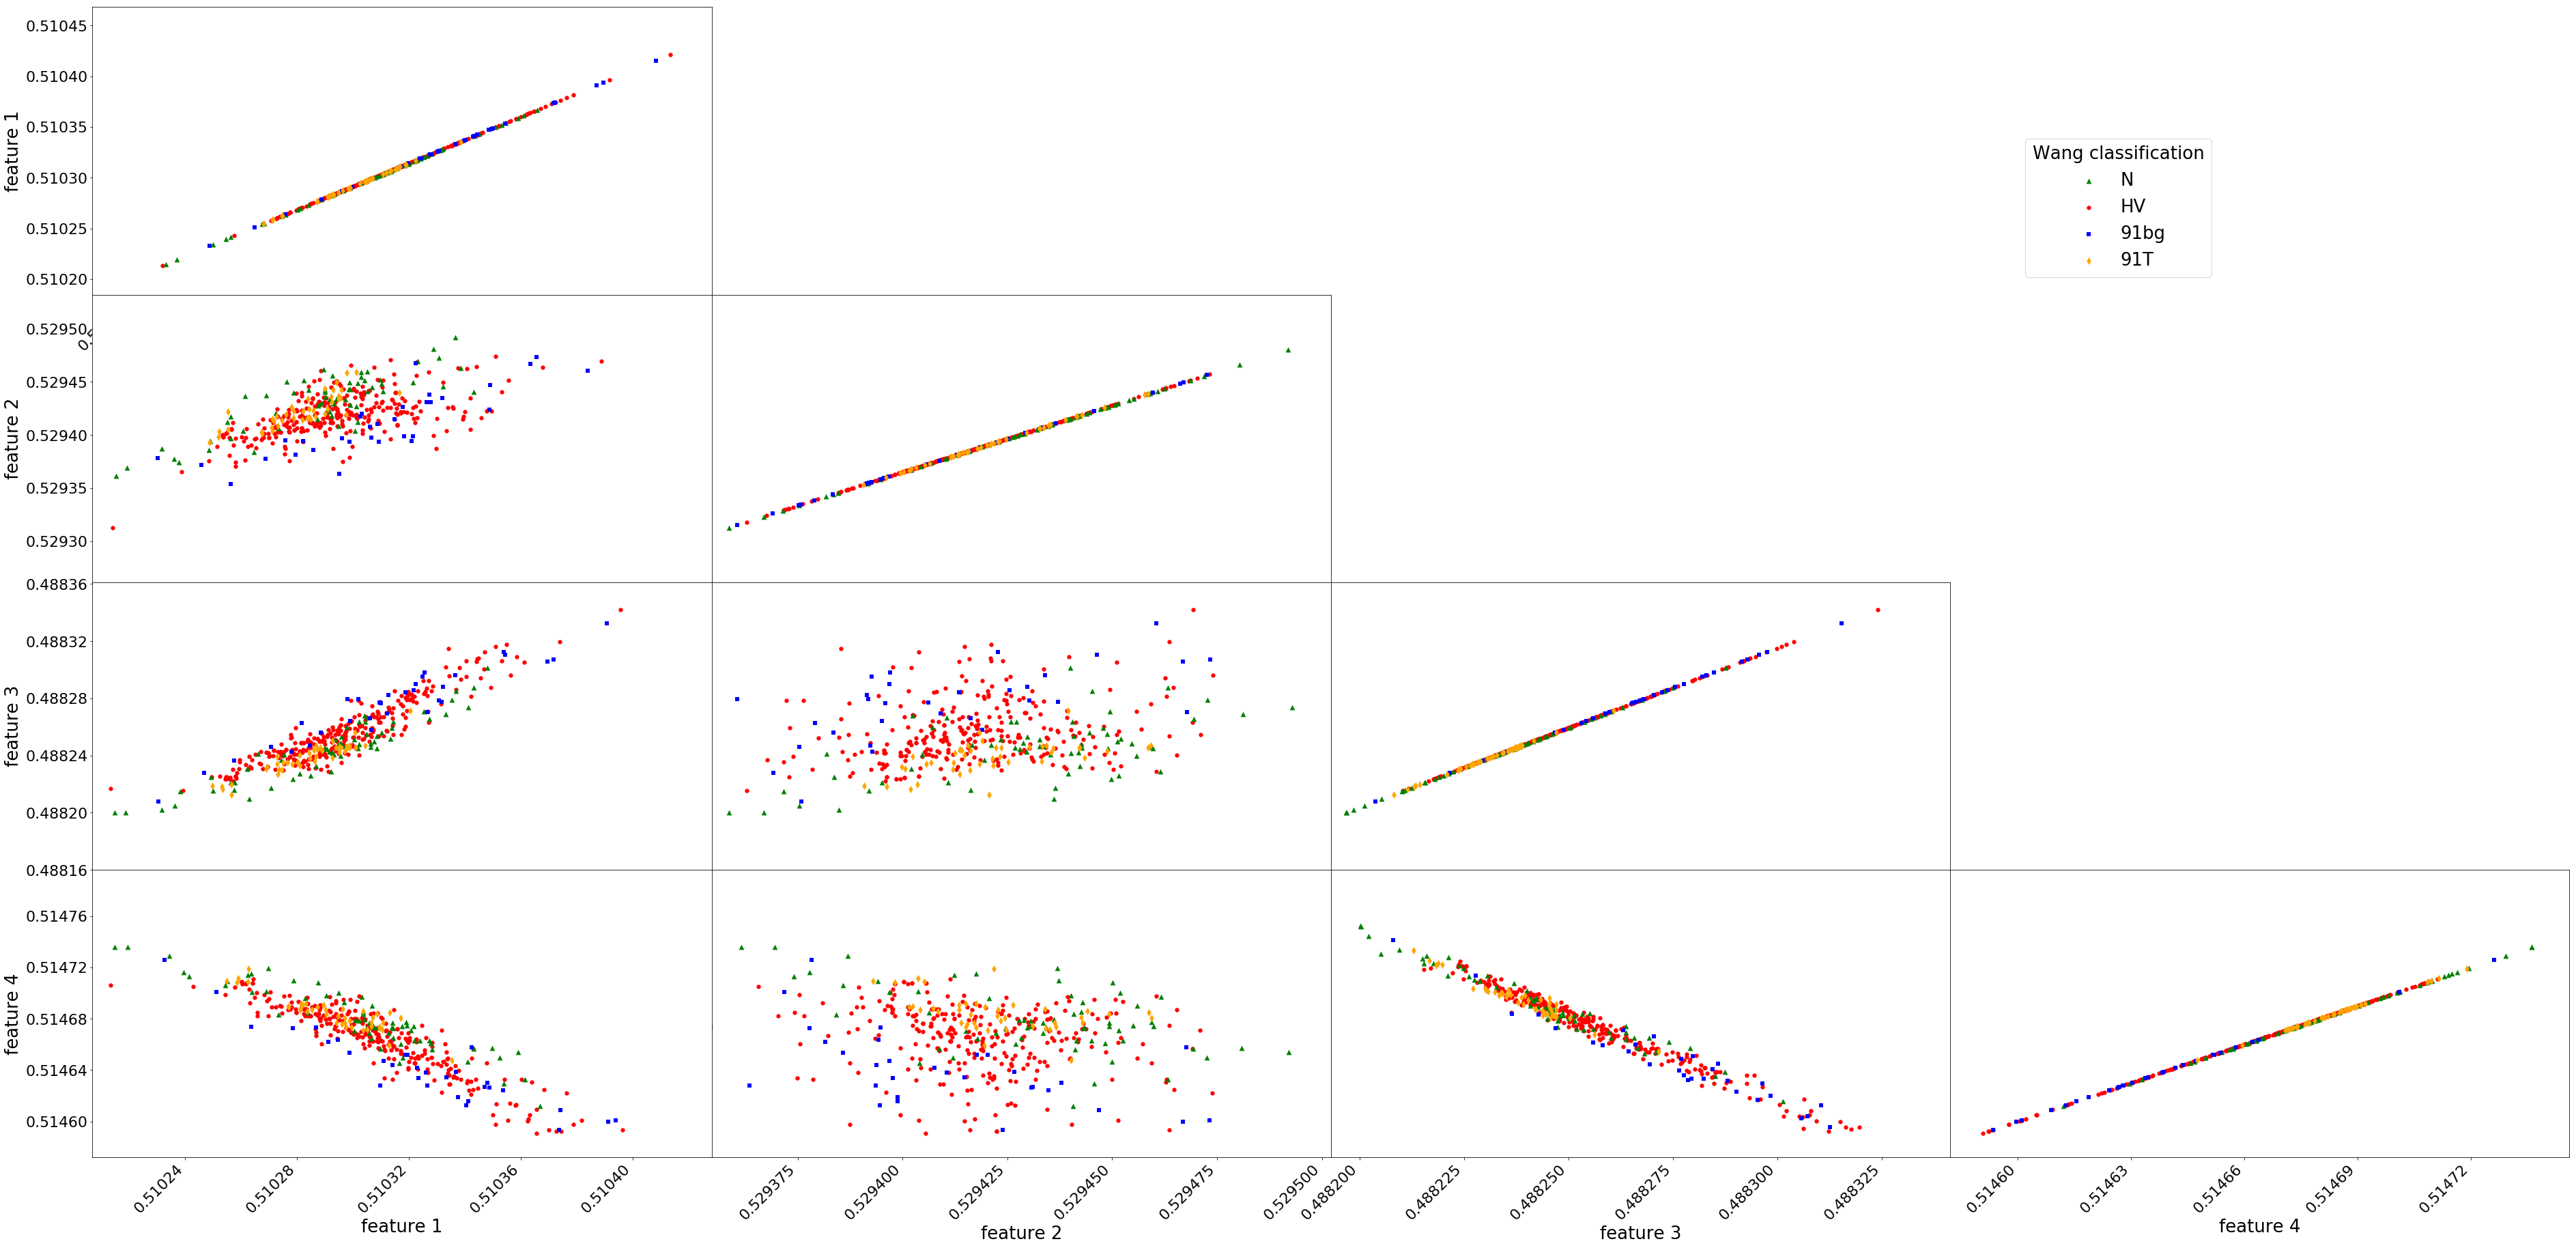

In [223]:
# plot only DL results
fig = plt.figure(figsize=(56,26))
plt.subplot(4,4,1)
legs = [[] for k in range(len(wang_code))]
names = []
for j in [1,0,2,3]:
    legs[j] = plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],0], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
    names.append(color_wang[2]['name'][j])
plt.ylabel('feature 1', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.00003,matrix[group1,0].max()+0.000070)
plt.ylim(matrix[group1,0].min()-0.00003,matrix[group1,0].max()+0.0001)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,5)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],1], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 2', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,0].min()-0.00001,matrix[group1,0].max()+0.0001)
plt.ylim(matrix[group1,1].min()-0.0001,matrix[group1,1].max()+0.00004)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(4,4,6)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],1], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks(fontsize=22)
plt.yticks([])
#plt.ylabel('feature 2', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.xlim(matrix[group1,1].min()-0.000004,matrix[group1,].max()+0.00001)
plt.ylim(matrix[group1,1].min()-0.00004,matrix[group1,1].max()+0.00004)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")






plt.subplot(4,4,9)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(matrix[group1,0].min()-0.000009,matrix[group1,0].max()+0.00009)
plt.ylim(matrix[group1,2].min()-0.00004,matrix[group1,2].max()+0.00006)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))

plt.subplot(4,4,10)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks(fontsize=22)
plt.yticks([])
#plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 2', fontsize=26)
plt.xlim(matrix[group1,1].min()-0.000004,matrix[group1,1].max()+0.000009)
plt.ylim(matrix[group1,2].min()-0.00004,matrix[group1,2].max()+0.00006)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,11)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],2], matrix[wang_code[j],2], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xticks(fontsize=22)
plt.yticks([])
#plt.ylabel('feature 3', fontsize=26)
plt.xlabel('feature 3', fontsize=26)
plt.xlim(matrix[group1,2].min()-0.000004,matrix[group1,2].max()+0.00006)
plt.ylim(matrix[group1,2].min()-0.00004,matrix[group1,2].max()+0.00006)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")





plt.subplot(4,4,13)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],0], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.ylabel('feature 4', fontsize=26)
plt.xlabel('feature 1', fontsize=26)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(matrix[group1,0].min()-0.000008,matrix[group1,0].max()+0.00006)
plt.ylim(matrix[group1,3].min()-0.00004,matrix[group1,3].max()+0.00006)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,14)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],1], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 2', fontsize=26)
#plt.ylabel('feature 4', fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,1].min()-0.000007,matrix[group1,1].max()+0.00001)
plt.ylim(matrix[group1,3].min()-0.00004,matrix[group1,3].max()+0.00006)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")




plt.subplot(4,4,15)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],2], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 3',fontsize=26)
#plt.ylabel('feature 4',fontsize=26)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.yticks([])
plt.xticks(fontsize=22)

plt.xlim(matrix[group1,2].min()-0.000007,matrix[group1,2].max()+0.00004)
plt.ylim(matrix[group1,3].min()-0.00004,matrix[group1,3].max()+0.00004)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplot(4,4,16)
for j in [1,0,2,3]:
    plt.scatter(matrix[wang_code[j],3], matrix[wang_code[j],3], lw='0',marker=my_marks[j],s=ss[j], color=my_colors[j])
plt.xlabel('feature 4', fontsize=26)
#plt.ylabel('feature 4', fontsize=26)
plt.yticks([])
plt.xticks(fontsize=22)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
plt.xlim(matrix[group1,3].min()-0.00003,matrix[group1,3].max()+0.00001)
plt.ylim(matrix[group1,3].min()-0.00004,matrix[group1,3].max()+0.00006)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.subplots_adjust(left=0.075, right=0.975, top=0.975, bottom=0.075,hspace=0.0,wspace=0.0)

legend = fig.legend(legs, names, loc = (0.786, 0.778), title='Wang classification', fontsize=26)
plt.setp(legend.get_title(),fontsize=26)
plt.savefig("DL_KMeans_scatter_4gwang.pdf", format='pdf',dpi=1000)

plt.show()

# Reducing the data to 15 dimensions


In [225]:
#introducing the dimension we want to reduce to


encoding_dim = 15

In [226]:

input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(128, activation = activation2)(input_dim)
encoded2 = Dense(100, activation = activation2)(encoded1)
encoded3 = Dense(72, activation = activation2)(encoded2)
encoded4 = Dense(60, activation = activation2)(encoded3)
encoded5 = Dense(40, activation = activation2)(encoded4)
encoded6 = Dense(32, activation = activation2)(encoded5)
encoded7 = Dense(20, activation = activation2)(encoded6)
encoded8 = Dense(19, activation = activation2)(encoded7)
encoded9 = Dense(16, activation = activation2)(encoded8)
encoded_middle = Dense(encoding_dim, activation = activation)(encoded9)

# Decoder Layers
decoded0 = Dense(16, activation = activation2)(encoded_middle)
decoded1 = Dense(19, activation = activation2)(decoded0)
decoded2 = Dense(20, activation = activation2)(decoded1)
decoded3 = Dense(32, activation = activation2)(decoded2)
decoded4 = Dense(40, activation = activation2)(decoded3)
decoded5 = Dense(60, activation = activation2)(decoded4)
decoded6 = Dense(72, activation = activation2)(decoded5)
decoded7 = Dense(100, activation = activation2)(decoded6)
decoded8 = Dense(128, activation = activation2)(decoded7)
decoded_out = Dense(ncol, activation = activation)(decoded8)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded_out)
#
middle  = Model(inputs =input_dim, outputs = encoded_middle)


# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

#
middle.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [227]:
autoencoder.summary()
middle.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               38016     
_________________________________________________________________
dense_50 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_51 (Dense)             (None, 72)                7272      
_________________________________________________________________
dense_52 (Dense)             (None, 60)                4380      
_________________________________________________________________
dense_53 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1312      
__________

In [228]:
#  train and validation
autoencoder.fit(der, der ,nb_epoch = 10), 
                #batch_size = 1, 
                #shuffle = False, 
                #validation_data = (X_test,X_test))


/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/10
3677/3677 [==============================] - 3s 898us/step - loss: 0.2632
Epoch 2/10
3677/3677 [==============================] - 2s 437us/step - loss: -0.0030
Epoch 3/10
3677/3677 [==============================] - 2s 454us/step - loss: -0.0041
Epoch 4/10
3677/3677 [==============================] - 2s 424us/step - loss: -0.0042
Epoch 5/10
3677/3677 [==============================] - 2s 435us/step - loss: -0.0043
Epoch 6/10
3677/3677 [==============================] - 2s 431us/step - loss: -0.0043
Epoch 7/10
3677/3677 [==============================] - 2s 446us/step - loss: -0.0043
Epoch 8/10
3677/3677 [==============================] - 2s 456us/step - loss: -0.0043
Epoch 9/10
3677/3677 [==============================] - 2s 461us/step - loss: -0.0043
Epoch 10/10
3677/3677 [==============================] - 2s 453us/step - loss: -0.0043


(<keras.callbacks.History at 0x7f730b10f4a8>,)

In [234]:
#reduced data and its shape 

reduced_data15D=middle.predict(der)
print(reduced_data15D.shape)
encoded_train = pd.DataFrame(reduced_data15D)

encoded_train .to_csv('reduced_to_15D.csv', index=False)
encoded_train.head()

(3677, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.474508,0.497086,0.488596,0.512726,0.529870,0.535823,0.525223,0.510583,0.504330,0.498333,0.501759,0.500894,0.505962,0.500102,0.493668
1,0.474543,0.497156,0.488655,0.512764,0.529813,0.535795,0.525350,0.510555,0.504365,0.498338,0.501753,0.500843,0.506000,0.500120,0.493679
2,0.474484,0.497053,0.488622,0.512738,0.529875,0.535816,0.525274,0.510560,0.504364,0.498310,0.501810,0.500864,0.505971,0.500133,0.493645
3,0.474566,0.497192,0.488669,0.512765,0.529785,0.535773,0.525375,0.510548,0.504369,0.498343,0.501750,0.500827,0.506020,0.500120,0.493691
4,0.474583,0.497203,0.488643,0.512738,0.529765,0.535768,0.525264,0.510587,0.504330,0.498365,0.501720,0.500842,0.506053,0.500070,0.493740


In [235]:
middle.predict(der).shape

(3677, 15)

In [236]:
reconstructed15= autoencoder.predict(der)
encoded_train = pd.DataFrame(reconstructed15)
encoded_train .to_csv('reconstructed15D.csv', index=False)
encoded_train.head()


,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,0.000728,0.002014,0.003114,0.003741,0.003629,0.002861,0.001712,0.000505,1.428262e-08,5.262258e-08,...,0.000312,0.00031,2.320537e-08,0.000268,0.000225,0.000166,0.000074,0.000057,0.000052,0.000023
1,0.000728,0.002014,0.003114,0.003740,0.003628,0.002860,0.001712,0.000505,1.427704e-08,5.260372e-08,...,0.000312,0.00031,2.319652e-08,0.000268,0.000225,0.000166,0.000074,0.000057,0.000052,0.000023
2,0.000728,0.002014,0.003114,0.003741,0.003629,0.002861,0.001712,0.000505,1.428186e-08,5.262008e-08,...,0.000312,0.00031,2.320408e-08,0.000268,0.000225,0.000166,0.000074,0.000057,0.000052,0.000023
3,0.000728,0.002014,0.003114,0.003740,0.003628,0.002860,0.001712,0.000505,1.427652e-08,5.260191e-08,...,0.000312,0.00031,2.319559e-08,0.000268,0.000225,0.000166,0.000074,0.000057,0.000052,0.000023
4,0.000728,0.002014,0.003114,0.003741,0.003629,0.002861,0.001712,0.000505,1.428090e-08,5.261677e-08,...,0.000312,0.00031,2.320254e-08,0.000268,0.000225,0.000166,0.000074,0.000057,0.000052,0.000023


# Plotting the original and the reconstructed data

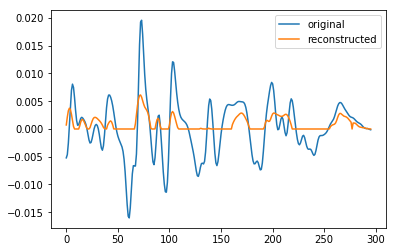

In [237]:
plt.plot(der[0,:],label='original')
plt.plot(reconstructed[0,:],label='reconstructed')
plt.legend()

# Creating a model to obtain data at Maximum brightness

# Plotting DL and PCA recontructed data

In [239]:
# read data
der = loadtxt('derivatives_all_epochs.dat')
flux = 0.8*loadtxt('fluxes_not_res.dat.gz')
labels = loadtxt('mask.dat')
spectra_data = genfromtxt('spectra_data_id.dat',dtype=None)
print(flux.shape)

(3677, 1480)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [240]:
# make pca reduction(to   4 dimensions )
pca = PCA(n_components=4)
pca.fit(der)
X = pca.transform(der)
pred_PCA = (pca.inverse_transform(X))

In [241]:
#dataframe of my reconstructed  data using PCA

encoded_train = pd.DataFrame(pred_PCA)
encoded_train.to_csv('recontructed4DPCA.csv', index=False)

In [242]:
#saving the reconstructed data

encoded_train.to_csv('recontructed4DPCA.csv', index=False)

In [243]:
encoded_train.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,-0.006063,-0.004159,-0.001048,0.002521,0.005670,0.007757,0.008487,0.007882,0.006273,0.004274,...,0.000562,0.000444,0.000336,0.000218,0.000081,-0.000070,-0.000210,-0.000317,-0.000375,-0.000381
1,0.001619,0.005096,0.008178,0.009705,0.009086,0.006553,0.002884,-0.001024,-0.004389,-0.006595,...,0.000360,0.000352,0.000364,0.000374,0.000367,0.000348,0.000336,0.000343,0.000363,0.000374
2,0.000476,0.004459,0.008397,0.010998,0.011433,0.009697,0.006436,0.002553,-0.001068,-0.003691,...,0.000331,0.000252,0.000209,0.000181,0.000154,0.000133,0.000131,0.000160,0.000208,0.000253
3,0.002339,0.004729,0.006482,0.006860,0.005642,0.003214,0.000273,-0.002529,-0.004723,-0.005982,...,0.000327,0.000356,0.000390,0.000409,0.000404,0.000379,0.000352,0.000337,0.000334,0.000332
4,-0.007724,-0.007309,-0.005706,-0.003138,-0.000081,0.002915,0.005305,0.006638,0.006720,0.005779,...,0.000189,0.000157,0.000121,0.000060,-0.000041,-0.000185,-0.000355,-0.000522,-0.000659,-0.000746


In [297]:
# make pca reduction(to   15 dimensions )

pca = PCA(n_components=15)
pca.fit(der)
X = pca.transform(der)
pred_PCA_15PC = (pca.inverse_transform(X))

In [298]:
#data frame of my reconstructed  data using PCA

encoded_train = pd.DataFrame(pred_PCA_15PC)



In [299]:
encoded_train.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,-0.005842,-0.005141,-0.002963,0.000243,0.003546,0.006005,0.007021,0.006473,0.004715,0.002484,...,0.000904,0.000624,0.000351,0.000107,-0.000104,-0.000298,-0.000486,-0.000660,-0.000785,-0.000826
1,-0.001193,0.002369,0.006610,0.009926,0.011010,0.009533,0.006098,0.001765,-0.002384,-0.005463,...,0.000368,0.000363,0.000353,0.000344,0.000347,0.000377,0.000436,0.000508,0.000559,0.000554
2,-0.002548,0.001918,0.007398,0.012059,0.014289,0.013495,0.010186,0.005541,0.000914,-0.002545,...,0.000432,0.000318,0.000202,0.000099,0.000036,0.000037,0.000104,0.000202,0.000279,0.000295
3,0.000738,0.004310,0.007513,0.009140,0.008574,0.006045,0.002391,-0.001401,-0.004517,-0.006429,...,0.000236,0.000321,0.000383,0.000427,0.000470,0.000526,0.000588,0.000628,0.000616,0.000537
4,-0.005978,-0.005899,-0.004856,-0.002693,0.000296,0.003455,0.006008,0.007350,0.007253,0.005948,...,0.000375,0.000353,0.000318,0.000248,0.000130,-0.000044,-0.000262,-0.000502,-0.000731,-0.000917


In [300]:
#saving the reconstructed data
encoded_train.to_csv('reconstructed15DPCA.csv', index=False)

In [301]:
encoded_train.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,-0.005842,-0.005141,-0.002963,0.000243,0.003546,0.006005,0.007021,0.006473,0.004715,0.002484,...,0.000904,0.000624,0.000351,0.000107,-0.000104,-0.000298,-0.000486,-0.000660,-0.000785,-0.000826
1,-0.001193,0.002369,0.006610,0.009926,0.011010,0.009533,0.006098,0.001765,-0.002384,-0.005463,...,0.000368,0.000363,0.000353,0.000344,0.000347,0.000377,0.000436,0.000508,0.000559,0.000554
2,-0.002548,0.001918,0.007398,0.012059,0.014289,0.013495,0.010186,0.005541,0.000914,-0.002545,...,0.000432,0.000318,0.000202,0.000099,0.000036,0.000037,0.000104,0.000202,0.000279,0.000295
3,0.000738,0.004310,0.007513,0.009140,0.008574,0.006045,0.002391,-0.001401,-0.004517,-0.006429,...,0.000236,0.000321,0.000383,0.000427,0.000470,0.000526,0.000588,0.000628,0.000616,0.000537
4,-0.005978,-0.005899,-0.004856,-0.002693,0.000296,0.003455,0.006008,0.007350,0.007253,0.005948,...,0.000375,0.000353,0.000318,0.000248,0.000130,-0.000044,-0.000262,-0.000502,-0.000731,-0.000917


In [249]:
# load deep learning results (4D data)

pred_DL=reconstructed
pred_DL.shape

(3677, 296)

In [250]:
pred_DL.shape

(3677, 296)

In [251]:
# define wavelength range
wavelenght_array = array(range(3200,9000,2))
len(wavelenght_array)

2900

In [252]:

print(wavelenght_array[370])

print(wavelenght_array[1849])

3940
6898


In [253]:
#picking up every value in the wavelength array from index 360 to 1850 
wavelenght_array = wavelenght_array[range(370,1850,1)]
print(len(wavelenght_array))
print(wavelenght_array)

1480
[3940 3942 3944 ... 6894 6896 6898]


In [254]:
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np


In [255]:
#coping the selected array of wavelength

wavelenght_array_flux = copy(wavelenght_array)
len(wavelenght_array_flux)

1480

In [256]:
# the different between the index is 5 so after five indexes we pik a number

wavelenght_array = wavelenght_array[::5]
print(len(wavelenght_array))
# since we have 256 columns on our reconstructed data we should also have 296 vavelenth values
len(wavelenght_array)

296


296

In [257]:
#reduce by 5

wavelenght_array_int = wavelenght_array[:]-5.
len(wavelenght_array_int)

296

In [258]:
# plot
n_plot1 = 0

range_to_plot =[
 2240,
2920,
47,
175,
 3174,
17,
 108,
 1401,
 26,
 1794,
 ]

n_plot = size(range_to_plot)
 #creating two enmpty list
axs = [[] for i in range(2)]
print(axs)



[[], []]


In [259]:
pred_DL[range_to_plot[0]][:1]

array([0.00072685], dtype=float32)

In [260]:
sum(pred_DL[range_to_plot[0]][:1])

0.0007268531480804086

In [99]:
names = ['measured', 'reconst. 4PCs', 'reconst. 15PCs', 'reconst. Autoencoder \n 4 features']
#'reconst. 4PCs', 'reconst. 15PCs',






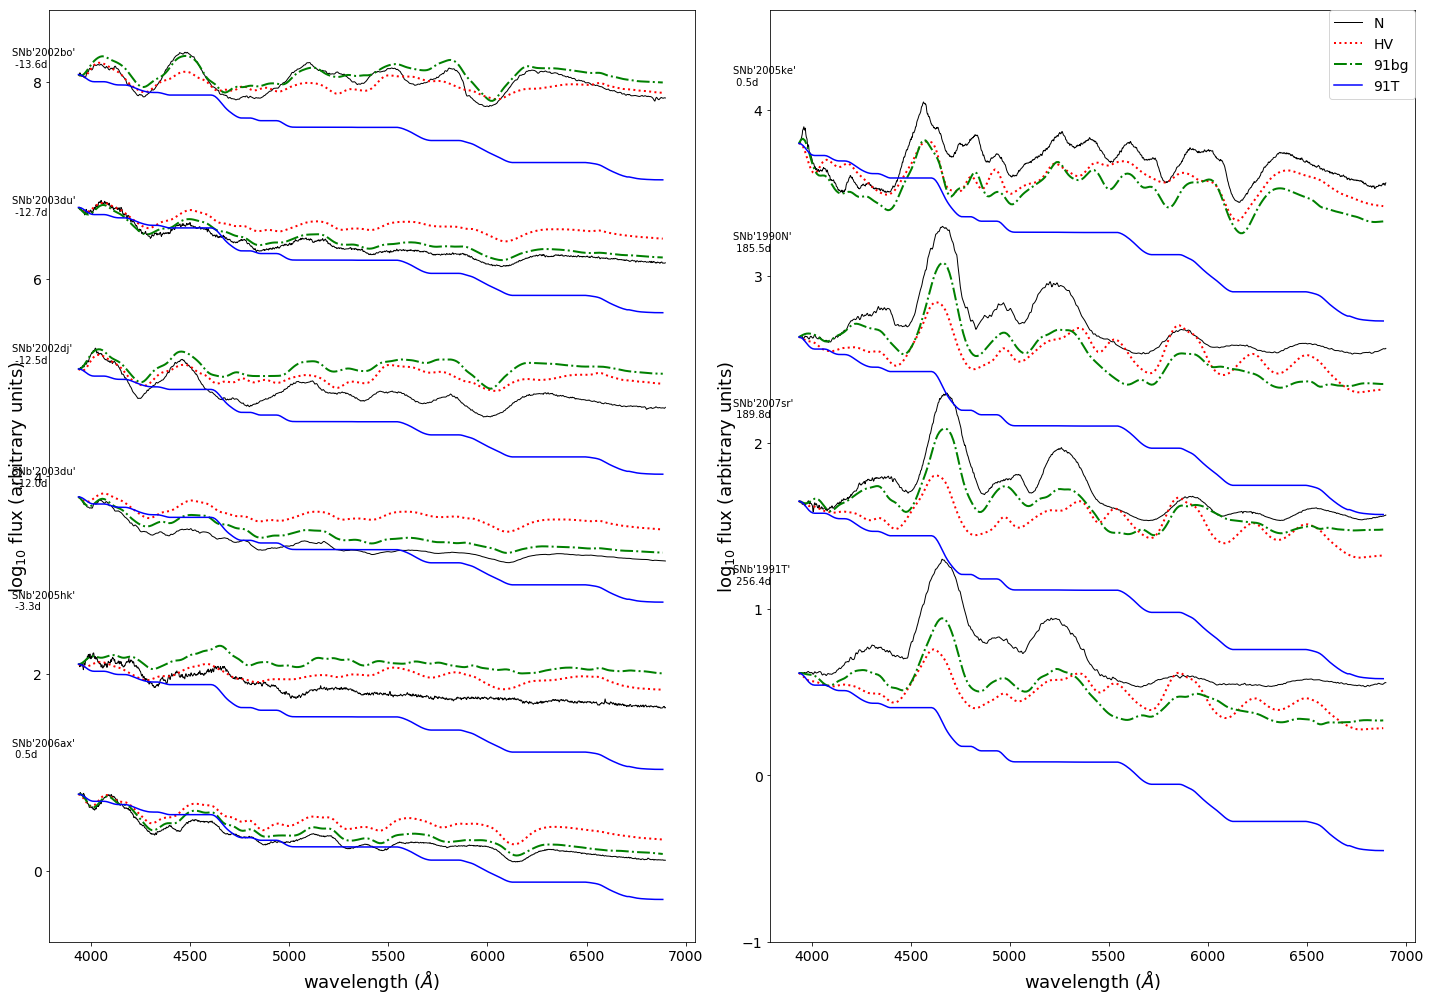

In [296]:


fig = plt.figure(figsize=(20,14))
plt.subplot(1,2,1)
plt.plot(wavelenght_array_flux, flux[range_to_plot[0]], color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[1]] + 1.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[2]] + 3.0, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[3]] + 4.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[4]] + 6.0, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[5]] + 7.5, color='black', lw=1.0)





plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='red', ls=':', lw=2.0)






plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='green', ls='-.', lw=2.0)



plt.text(3600, 1.15, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[0]][2:],spectra_data['f3'][range_to_plot[0]]))
plt.text(3600, 1.15 + 1.5, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[1]][2:],spectra_data['f3'][range_to_plot[1]]))
plt.text(3600, 1.15 + 2.75, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[2]][2:],spectra_data['f3'][range_to_plot[2]]))
plt.text(3600, 1.15 + 4.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[3]][2:],spectra_data['f3'][range_to_plot[3]]))
plt.text(3600, 1.15 + 5.5, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[4]][2:],spectra_data['f3'][range_to_plot[4]]))
plt.text(3600, 1.15 + 7.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[5]][2:],spectra_data['f3'][range_to_plot[5]]))

plt.xlabel('wavelength ($\AA$)', fontsize=18)
plt.ylabel('$\log_{10}$ flux (arbitrary units)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)





plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[0]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[0]][0], color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[1]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[1]][0] + 1.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[2]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[2]][0] + 3.0, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[3]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[3]][0] + 4.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[4]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[4]][0] + 6.0, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[5]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[5]][0] + 7.5, color='blue', lw=1.5)


axs = plt.subplot(1,2,2)
line,  = axs.plot(wavelenght_array_flux, flux[range_to_plot[6]] + 0.5, color='black', label=names[0], lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[7]] + 1.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[8]] + 2.5, color='black', lw=1.0)
plt.plot(wavelenght_array_flux, flux[range_to_plot[9]] + 3.25, color='black', lw=1.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='red', ls=':', lw=2.0, label=names[1])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='red', ls=':', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='red', ls=':', lw=2.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='green', ls='-.', lw=2.0, label=names[2])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='green', ls='-.', lw=2.0)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_PCA_15PC[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='green', ls='-.', lw=2.0)

line,  = axs.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[6]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[6]][0] + 0.5, color='blue', lw=1.5, label=names[3])
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[7]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[7]][0] + 1.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[8]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[8]][0] + 2.5, color='blue', lw=1.5)
plt.plot(wavelenght_array_int, -4*np.array([sum(pred_DL[range_to_plot[9]][:i]) for i in range(size(der[0]))]) + flux[range_to_plot[9]][0] + 3.25, color='blue', lw=1.5)

plt.text(3600, 1.15, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[6]][2:],spectra_data['f3'][range_to_plot[6]]))
plt.text(3600, 1.15 + 1.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[7]][2:],spectra_data['f3'][range_to_plot[7]]))
plt.text(3600, 1.15 + 2.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[8]][2:],spectra_data['f3'][range_to_plot[8]]))
plt.text(3600, 1.15 + 3.0, 'SN%s \n %.1fd' % (spectra_data['f0'][range_to_plot[9]][2:],spectra_data['f3'][range_to_plot[9]]))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('wavelength ($\AA$)', fontsize=18)
plt.ylabel('$\log_{10}$ flux (arbitrary units)', fontsize=18)
plt.ylim(-1,4.6)

plt.tight_layout()
axs.legend(bbox_to_anchor=(1.010, 1.007), ncol=1, fontsize=14)
plt.savefig('reconstructions_pca_auto.pdf', format='pdf', dpi=1000)
plt.show()

# Tranfer learning PCA

In [289]:
# make pca reduction(to   7 dimensions )

pca = PCA(n_components=7)
pca.fit(der)
X = pca.transform(der)
pred_PCA_7PC = (pca.inverse_transform(X))

In [290]:
X.shape

(3677, 7)

In [292]:
import pylab as plt
import numpy as np

# path to PCA reduced data
path_pca = X

# path to mask identifying spectra at max
path_mask = 'mask.dat'
encoded_train = pd.DataFrame(X)

encoded_train.to_csv('recontructed7DPCA.csv', index=False)

In [293]:


data1 = [elem for elem in path_pca]

# construct data matrix
matrix = np.array([[float(item) for item in line] for line in data1])

# read mask
op2 = open(path_mask, 'r')
lin2 = op2.readlines()
op2.close()

labels = np.array([float(elem.split()[0]) for elem in lin2])

at_max = labels == 1.0
all_spec = labels == 0.0



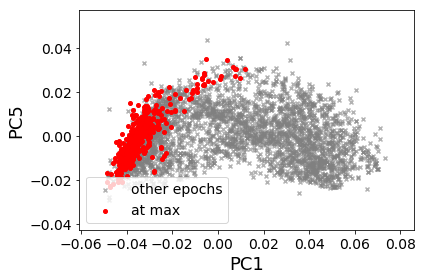

In [294]:
# plot PC1 and PC5
plt.figure()
plt.scatter(matrix[all_spec, 0], matrix[all_spec, 4], color='gray', alpha=0.6, marker='x', s=16, label='other epochs')
plt.scatter(matrix[at_max,0], matrix[at_max,4], color='red', marker='o', s=16, label='at max')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC5', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower left')
plt.tight_layout()
plt.savefig('transfer_learning_scatterPCA.pdf', format='pdf', dpi=1000)

# Tranfer learning Autoencoders

In [288]:
import pylab as plt
import numpy as np

# path to autoencoders  reduced data(15D)
path_pca = reduced_data15D

# path to mask identifying spectra at max
path_mask = 'mask.dat'


In [269]:
data1 = [elem for elem in path_pca]

# construct data matrix
matrix = np.array([[float(item) for item in line] for line in data1])

# read mask
op2 = open(path_mask, 'r')
lin2 = op2.readlines()
op2.close()

labels = np.array([float(elem.split()[0]) for elem in lin2])

at_max = labels == 1.0
all_spec = labels == 0.0


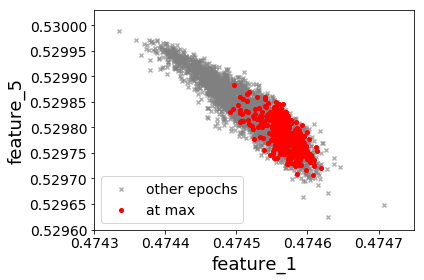

In [282]:
# plot PC1 and PC5
plt.figure()
plt.scatter(matrix[all_spec, 0], matrix[all_spec, 4], color='gray', alpha=0.6, marker='x', s=16, label='other epochs')
plt.scatter(matrix[at_max,0], matrix[at_max,4], color='red', marker='o', s=16, label='at max')
plt.xlabel('feature_1', fontsize=18)
plt.ylabel('feature_5', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0.4743,0.47475)
plt.ylim(0.5296,0.53003)
plt.legend(fontsize=14, loc='lower left')
plt.tight_layout()
plt.savefig('transfer_learning_scatterAT.pdf', format='pdf', dpi=1000)

# Isomap reduction method

In [303]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from sklearn import manifold


In [304]:
def load_colors(sne_list,type='Wang'):

    import urllib
    import numpy
    
    #path1 = 'https://iopscience.iop.org/1538-3881/143/5/126/suppdata/aj427309t4_mrt.txt'
    #op1 = urllib.urlopen(path1, 'r')
    op1=open('aj427309t4_mrt.txt','r')
    lin1 = op1.readlines()
    op1.close()
    #data1 = [elem[17:].split() for elem in lin1[51:]]
    data1 = [elem[:16].split()[0] for elem in lin1[51:]]
    data2 = [elem[41:].split() for elem in lin1[51:]]
    
    for i in range(numpy.shape(data2)[0]):
        if numpy.size(data2[i])==1:
            data2[i]= [ data2[i][0],'nan']
    
    if type=='Wang':
        name_dict={'name':['HV','N','91bg','91T','nan'],
                   'color':['y','g','c','r','b'],
                   'mark':[u"s",u"o",u"2",u"D",u"*"]}

        index=1
    if type=='Branch':
        name_dict={'name':['BL','CN','CL','SS'],
                   'color':['y','g','r','b'],
                   'mark':[u"s",u"o",u"2",u"D"]}
        index=0

    col_=[name_dict['name'],name_dict['color']]
    mark_=[name_dict['name'],name_dict['mark']]
    color_list=[]
    shape_list=[]
    for i in sne_list:
        if i[2:] in data1:
            color_list.append( col_[1][col_[0].index(data2[data1.index(i[2:])][index])])
            shape_list.append(mark_[1][mark_[0].index(data2[data1.index(i[2:])][index])])
        else:
            color_list.append('k')
            shape_list.append(u'x')
    return color_list,shape_list,name_dict
###############################################################################################


In [305]:

# path to DL results
path_small_space = reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# path to kmeans result
path_kmeans = 'clustering_KMeans_label_4features_4groups.dat'


In [306]:

# color for plotting
c = [ 'blue', 'red', 'green', 'orange', 'black']

# markers for ploting
mark =  ['^','o',  's', 'd', '*']

In [322]:
# markers size
size = [75, 65, 65, 70, 75]

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]
names_max = [names_all[i][0] for i in range(len(names_all)) if names_all[i][-1] == '1']

# build wang color code 
color_wang = load_colors(names_max)

# separate groups accorging to wang classification
wang_code = []
for kk in [0,1,2,3,4]:
    temp_code = np.array(color_wang[0]) == color_wang[2]['color'][kk]
    wang_code.append(temp_code)


# read DL results
#op1 = open(path_small_space, 'r')
#lin1 = op1.readlines()
#op1.close()

data1 = [elem for elem in reduced_data4D]

matrix = np.array([[float(item) for item in data1[i]] for i in range(len(data1)) if names_all[i][-1]=='1'])





In [326]:








# do isomap reduction
n_neighbors = 10
n_components = 2
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(matrix)

# read kmeans results
op3 = open(path_kmeans, 'r')
lin3 = op3.readlines()
op3.close()

classes = np.array([float(elem.split()[0]) for elem in lin3])
group1 = classes == 0.0
group2 = classes == 1.0
group3 = classes == 2.0
group4 = classes == 3.0



In [327]:
Y

array([[ 1.29342759e-05,  1.53750543e-05],
       [-1.77442846e-05,  2.54963472e-06],
       [-2.42800120e-05, -2.49854413e-05],
       [-3.02606910e-05, -2.70706634e-05],
       [-5.32428122e-05, -2.42433267e-05],
       [ 1.81142679e-08, -1.78314727e-05],
       [-6.27454518e-05,  1.43959576e-05],
       [ 9.91909100e-06, -2.40250998e-07],
       [ 4.00731221e-05,  1.34773977e-05],
       [ 3.46554235e-05,  6.88426368e-06],
       [-4.77819781e-07,  1.42392814e-05],
       [ 5.87871040e-06,  1.07559664e-05],
       [ 2.10100846e-05, -2.33991193e-05],
       [-1.09519856e-06, -4.58380639e-05],
       [-2.25178950e-06, -2.87934041e-05],
       [ 5.64224722e-05,  1.67888418e-05],
       [ 2.86207761e-06, -6.46493702e-05],
       [ 7.54797235e-05, -5.69871960e-06],
       [-1.19992448e-04,  4.36911256e-06],
       [-6.67566553e-05,  4.16889357e-05],
       [ 7.54105870e-05,  1.54708460e-06],
       [ 7.27901234e-05, -8.86925111e-07],
       [ 6.86657229e-05, -2.95130524e-06],
       [ 7.

In [330]:
Y[group1, 0]

array([-2.42800120e-05, -3.02606910e-05, -5.32428122e-05,  1.81142679e-08,
        2.10100846e-05, -1.09519856e-06, -2.25178950e-06,  2.86207761e-06,
        1.04992970e-04,  8.52233920e-05,  3.98419666e-05,  5.75752401e-05,
        7.29479838e-05,  7.85302946e-05,  9.68030626e-05, -1.24873616e-05,
       -8.50209792e-06, -1.02189854e-05,  2.00091268e-05, -4.47420391e-05,
       -7.06476660e-06,  4.04971516e-05, -1.77942572e-05, -1.54694089e-05,
        1.45310357e-05, -2.11027611e-05, -3.59953178e-05, -4.71241557e-05,
       -3.49398644e-05, -3.25926905e-05,  1.06340940e-05, -1.06518226e-04,
       -5.89965338e-06,  1.68359467e-05,  4.38649117e-07,  1.01549422e-05,
       -1.24930884e-05,  1.68547242e-05, -1.41562352e-05, -5.50017501e-05,
        9.59545280e-06, -4.94601882e-07,  3.93832352e-06, -1.63099379e-05,
        3.26639223e-05,  9.85274399e-06, -1.98395879e-05,  8.03981488e-06,
       -4.05771972e-05, -7.49035736e-06,  2.25190851e-05,  8.24247274e-07,
       -2.08461161e-05, -

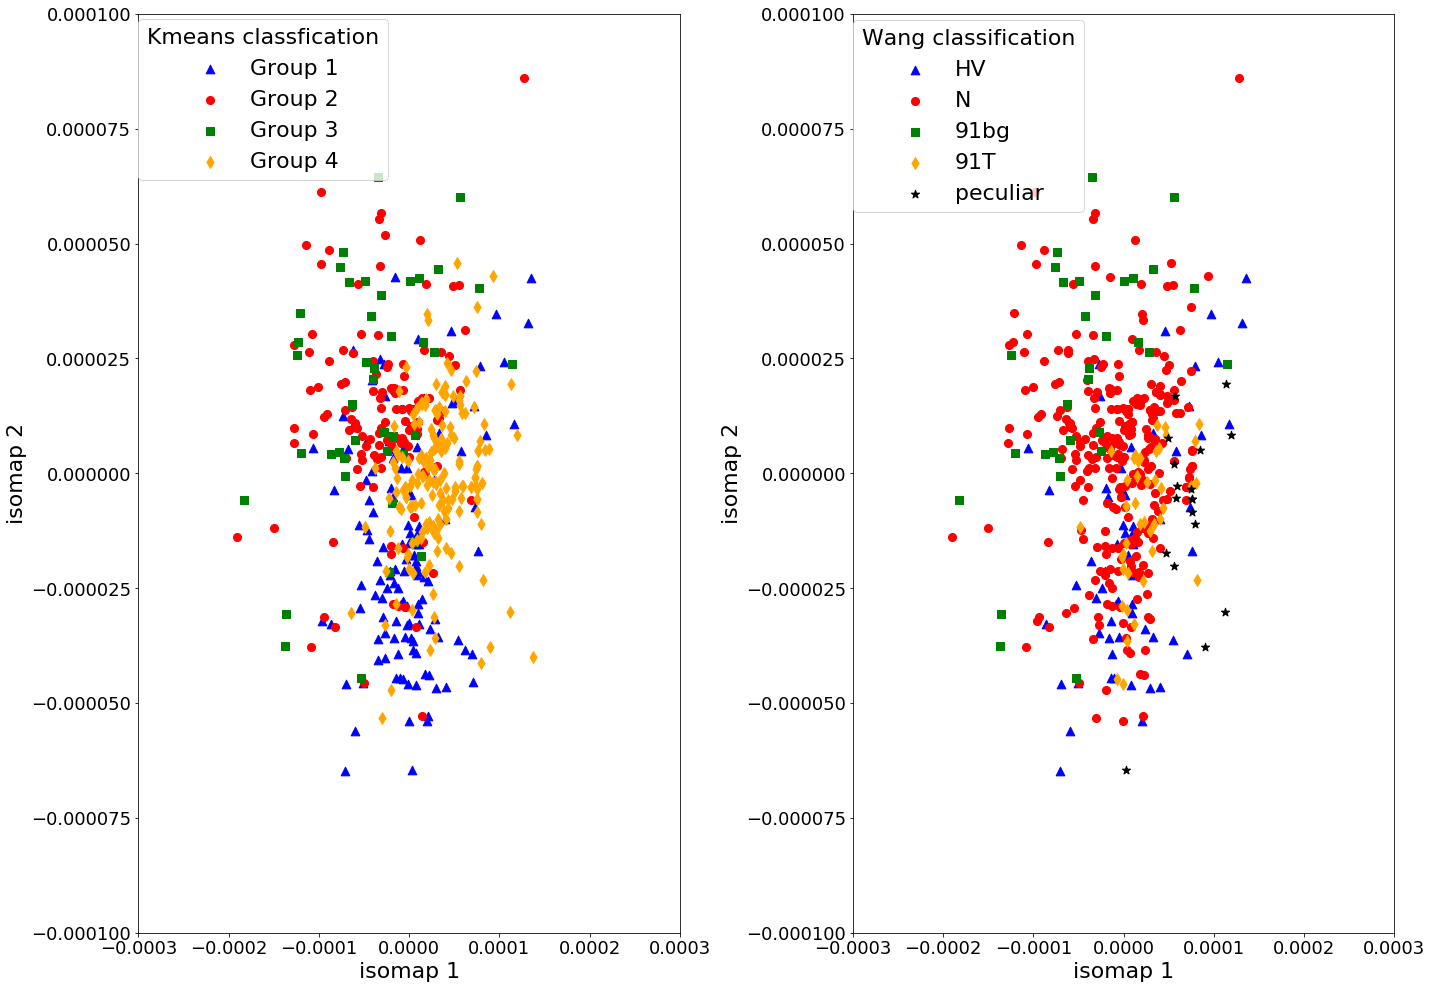

In [347]:
# plot isomap reduction results
panels = [[] for i in range(4)]
plt.figure(figsize=(20,14))
fig1 = plt.subplot(1,2,1)
panels[0] = plt.scatter(Y[group1, 0], Y[group1, 1], color=c[0], marker=mark[0], s=75)
panels[1] = plt.scatter(Y[group2, 0], Y[group2, 1], color=c[1], marker=mark[1], s=65)
panels[2] = plt.scatter(Y[group3, 0], Y[group3, 1], color=c[2], marker=mark[2], s=65)
panels[3] = plt.scatter(Y[group4, 0], Y[group4, 1], color=c[3], marker=mark[3], s=70)
legs=fig1.legend(panels, ['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = (0.0, 0.819), title='Kmeans classfication', fontsize=22)
plt.setp(legs.get_title(),fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-0.0003, 0.0003)
plt.ylim(-0.0001, 0.0001)
plt.xlabel('isomap 1', fontsize=22)
plt.ylabel('isomap 2', fontsize=22)



panels2 = [[] for i in range(5)]
names = []
fig2 = plt.subplot(1,2,2)
for j in range(5):
    panels2[j] = plt.scatter(Y[wang_code[j],0], Y[wang_code[j],1], marker=mark[j], color=c[j], s=size[j])
    if color_wang[2]['name'][j] != 'nan':
        names.append(color_wang[2]['name'][j])
    else:
        names.append('peculiar')
legs2=fig2.legend(panels2, names, loc = (0.0, 0.784), title='Wang classification', fontsize=22)
plt.setp(legs2.get_title(),fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.xlim(-0.0003, 0.0003)
plt.ylim(-0.0001, 0.0001)
plt.xlabel('isomap 1', fontsize=22)
plt.ylabel('isomap 2', fontsize=22)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig("kmeans_wang_isomap_4g1.pdf", format='pdf',dpi=1000)
plt.show()


In [ ]:
import pylab as plt
from numpy import loadtxt, genfromtxt, savetxt, var, random
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, ylim, legend


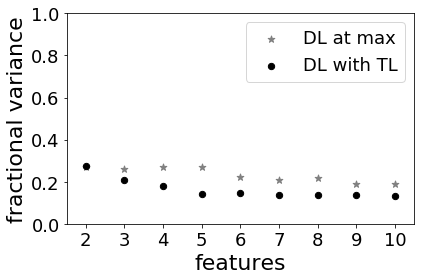

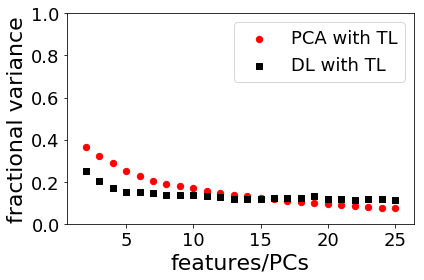

In [349]:

data_to_plot = loadtxt('residuals.dat').T

plt.figure()
plt.scatter(data_to_plot[0], data_to_plot[3],marker='*', label='DL at max', color='gray',s=50)
plt.scatter(data_to_plot[0], data_to_plot[4],marker='o', label='DL with TL', color='black', s=40)
plt.ylabel('fractional variance', fontsize=22)
plt.xlabel('features', fontsize=22)
plt.ylim(0,1)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('FV_TL_DL.pdf', format='pdf', dpi=1000)


data_to_plot = loadtxt('residuals_all_matrix.dat').T
plt.figure()
plt.scatter(data_to_plot[0], data_to_plot[1],marker='o', color='red', label='PCA with TL', s=40)
plt.scatter(data_to_plot[0], data_to_plot[2],marker='s', color='black', label='DL with TL', s=40)
plt.ylabel('fractional variance', fontsize=22)
plt.xlabel('features/PCs', fontsize=22)
plt.ylim(0,1)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('FV_PCA_vs_DL.pdf', format='pdf', dpi=1000)


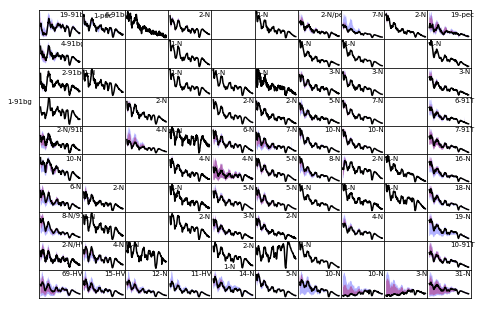

In [359]:
import numpy as np
import pylab as plt
import pandas as pd
import os
from scipy import stats



p = {'data_file': 'DL_4features_all_epochs.dat',
 'folder_out': '.',
 'path_data': '../../data/',
 'path_out': '.'}


nx = 10
ny = 10

labels_class ={'(0,0)': '91bg',
 '(0,1)': '91bg',
 '(0,2)': 'pec',
 '(0,3)': 'N',
 '(0,5)': 'N',
 '(0,6)': 'pec',
 '(0,7)': 'N',
 '(0,8)': 'N',
 '(0,9)': 'pec',
 '(1,0)': '91bg',
 '(1,3)': 'N',
 '(1,6)': 'N',
 '(1,7)': 'N',
 '(1,9)': 'N',
 '(2,0)': '91bg',
 '(2,1)': 'N',
 '(2,3)': 'N',
 '(2,4)': 'N',
 '(2,5)': 'N',
 '(2,6)': 'N',
 '(2,7)': 'N',
 '(2,9)': 'N',
 '(3,0)': '91bg',
 '(3,2)': 'N',
 '(3,4)': 'N',
 '(3,5)': 'N',
 '(3,6)': 'N',
 '(3,7)': 'N',
 '(3,9)': '91T',
 '(4,0)': '91bg',
 '(4,2)': 'N',
 '(4,3)': 'N',
 '(4,4)': 'N',
 '(4,5)': 'N',
 '(4,6)': 'N',
 '(4,7)': 'N',
 '(4,9)': '91T',
 '(5,0)': 'N',
 '(5,3)': 'N',
 '(5,4)': 'N',
 '(5,5)': 'N',
 '(5,6)': 'N',
 '(5,7)': 'N',
 '(5,8)': 'N',
 '(5,9)': 'N',
 '(6,0)': 'N',
 '(6,1)': 'N',
 '(6,3)': 'N',
 '(6,4)': 'N',
 '(6,5)': 'N',
 '(6,6)': 'N',
 '(6,7)': 'N',
 '(6,8)': 'N',
 '(6,9)': 'N',
 '(7,0)': '91T',
 '(7,1)': 'N',
 '(7,3)': 'N',
 '(7,4)': 'N',
 '(7,5)': 'N',
 '(7,7)': 'N',
 '(7,9)': 'N',
 '(8,0)': 'N',
 '(8,1)': 'N',
 '(8,2)': 'N',
 '(8,4)': 'N',
 '(8,5)': 'N',
 '(8,6)': 'N',
 '(8,9)': '91T',
 '(9,0)': 'HV',
 '(9,1)': 'HV',
 '(9,2)': 'N',
 '(9,3)': 'HV',
 '(9,4)': 'N',
 '(9,5)': 'N',
 '(9,6)': 'N',
 '(9,7)': 'N',
 '(9,8)': 'N',
 '(9,9)': 'N'}




w = tuple(map(tuple, np.loadtxt('w.dat')))

indx_unique = tuple(map(tuple, np.loadtxt('indx_unique.dat')))
indx_counts = tuple(map(tuple, np.loadtxt('indx_counts.dat')))

fluxes = np.loadtxt(os.path.join("fluxes_all_epochs.dat"))        
spectra_data = pd.read_csv(os.path.join("spectra_data_id.dat"),sep=" ")
labels = np.loadtxt(os.path.join("mask.dat"))
data_all = reduced_data4D

        
data = data_all[labels==1]
            
ndim = data.shape[0]
        
fluxes = fluxes[labels==1]
            
spectra_data = spectra_data[spectra_data["at_max_flag"] == 1]
         
spectra_data.columns = ["SN","zhelio","MJD","epoch","at_max_flag"]
            
spectra_data.index=range(ndim)

colors = []

for i in range(len(indx_unique)):
    colors.append((np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1)))
    colors.sort()

fig,ax = plt.subplots(nx,ny)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1,wspace=0.0,hspace=0.0)

FILE = open(os.path.join("stats.dat"),"w")
FILE_group_members = open(os.path.join("group_member_stats.dat"),"w")
FILE.write("Pair\t Nspec\t mean epoch\t epoch std\n")


for i in range(nx):
    for j in range(ny):
        indices = [ k for k in range(len(w)) if w[k] == (i,j)]
        if len(indices) == 0:
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            pass
        elif len(indices) == 1:
            #print indices
            f = fluxes[indices,:][0]
            n2 = f.shape[0]
            
            NORM = f[200:301].sum()
            f/=NORM
            epoch = spectra_data["epoch"].values[indices]
            
            epoch_mean = np.median(epoch)
            epoch_std = np.std(epoch)
          
            
            ax[i,j].plot(f,'k-' )
            if labels_class['(' +  str(i) +',' + str(j) + ')'] in ['91bg', 'pec']:
                xt = -4
            elif labels_class['(' +  str(i) +',' + str(j) + ')'] in ['91T', 'N']:
                xt = -3
            elif labels_class['(' +  str(i) +',' + str(j) + ')'] in ['HV']:
                xt = -2

            if '(' +  str(i) +',' + str(j) + ')' == '(8,5)':
                ax[i,j].text(ax[i,j].get_xticks()[0], 0.35*ax[i,j].get_ylim()[1], '1-' + labels_class['(' +  str(i) +',' + str(j) + ')'], 
                         fontsize=7)
            else:
                ax[i,j].text(ax[i,j].get_xticks()[xt], 0.8*ax[i,j].get_ylim()[1], '1-' + labels_class['(' +  str(i) +',' + str(j) + ')'], 
                         fontsize=7)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])

            FILE.write("(%d,%d)\t %d\t\t\t %.2f\t\t\t %.2f\n"%(i,j,len(indices),epoch_mean,epoch_std) )
                    
            #if len(indices) !=0:
                    
            FILE_group_members.write("Pair =(%d,%d)\t Nspec=%d\t\t\t mean epoch=%.2f\t\t\t epoch std=%.2f\n"%(i,j,len(indices),epoch_mean,epoch_std) )
                       
            FILE_group_members.write("SNIa\t zhelio\t MJD\t epoch\n")
                        
            #print "SNIa\t zhelio\t MJD\t epoch\n"
                        
            for SNIa in spectra_data.values[indices]:
                            
                FILE_group_members.write("%s\t %.5f\t %.2f\t %.3f\n"%(SNIa[0],SNIa[1],SNIa[2],SNIa[3]))
                            
                #print "%s\t %.5f\t %.2f\t %.3f"%(SNIa[0],SNIa[1],SNIa[2],SNIa[3])
                        
            FILE_group_members.write("-----------------------------------------------------------------\n")
            
        
        else:
            
            f = fluxes[indices]
            epoch = spectra_data["epoch"].values[indices]
            
            n1,n2 = f.shape
    
            epoch_mean = np.median(epoch)
            #epoch_mean = stats.nanmean(epoch)
            epoch_std = np.std(epoch)
            
            for k in range(n1):
                NORM = f[k,200:301].sum()
                for kk in range(n2):
                    f[k,kk]/=NORM
            
            ff=np.median(f,axis=0)
    
            CL68 = np.array( [ [ stats.scoreatpercentile(f[:,k],16), stats.scoreatpercentile(f[:,k],16+68)] for k in range(n2)] )
            CL95 = np.array( [ [ stats.scoreatpercentile(f[:,k],2.5), stats.scoreatpercentile(f[:,k],97.5)] for k in range(n2) ] )
    
    
            ax[i,j].plot(range(n2),ff,'k-' )
        
            ax[i,j].fill_between( range(n2) ,CL68[:,0], CL68[:,1],interpolate=True,facecolor = "red",alpha = 0.4)
            ax[i,j].fill_between( range(n2) , CL95[:,0], CL95[:,1],interpolate= True,facecolor = "blue",alpha = 0.3)
                

            if '(' +  str(i) +',' + str(j) + ')' == '(0,0)':
                ax[i,j].text(0.45*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(0,1)':
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' in ['(4,9)', '(9,2)']:
                ax[i,j].text(0.6*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' in ['(4,6)', '(4,7)', '(9,4)', '(9,6)', '(9,7)', '(5,0)','(7,9)', '(6,9)', '(5,9)']:
                ax[i,j].text(0.6*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' in ['(1,0)', '(9,0)','(9,1)', '(9,3)',  '(8,9)', '(0,9)']:
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(2,0)':
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(3,9)':
                ax[i,j].text(0.6*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(9,9)':
                ax[i,j].text(0.6*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(0,6)':
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], '2-N/pec', fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(1,7)':
                ax[i,j].text(0.7*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], '1-N', fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(4,0)':
                ax[i,j].text(0.4*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], '2-N/91bg', fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(8,0)':
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-N/HV', fontsize=7)
            elif '(' +  str(i) +',' + str(j) + ')' == '(7,0)':
                ax[i,j].text(0.5*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-N/91T', fontsize=7)
            elif labels_class['(' +  str(i) +',' + str(j) + ')'] != 0:
                ax[i,j].text(0.7*ax[i,j].get_xlim()[1], 0.8*ax[i,j].get_ylim()[1], str(len(indices)) + '-' + labels_class['(' +  str(i) +',' + str(j) + ')'], fontsize=7)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
        
            

            #print "Pair = (%d,%d)\t Nspec=%d\t mean epoch=%.2f\t epoch std=%.2f"%(i,j,len(indices),epoch_mean,epoch_std)
            FILE.write("(%d,%d)\t %d\t\t\t %.2f\t\t\t %.2f\n"%(i,j,len(indices),epoch_mean,epoch_std) )
                    
            #if len(indices) !=0:
                    
            FILE_group_members.write("Pair =(%d,%d)\t Nspec=%d\t\t\t mean epoch=%.2f\t\t\t epoch std=%.2f\n"%(i,j,len(indices),epoch_mean,epoch_std) )
                       
            FILE_group_members.write("SNIa\t zhelio\t MJD\t epoch\n")
                        
            #print "SNIa\t zhelio\t MJD\t epoch\n"
                        
            for SNIa in spectra_data.values[indices]:
                            
                FILE_group_members.write("%s\t %.5f\t %.2f\t %.3f\n"%(SNIa[0],SNIa[1],SNIa[2],SNIa[3]))
                            
                #print "%s\t %.5f\t %.2f\t %.3f"%(SNIa[0],SNIa[1],SNIa[2],SNIa[3])
                        
            FILE_group_members.write("-----------------------------------------------------------------\n")
            #print "-----------------------------------------------------------------"
                        
                            
                            
                        

FILE.close()
FILE_group_members.close()

fig.savefig(os.path.join("SOM_grid_10x10.pdf1"),format = "pdf",dpi = 4000)
    


# dslflgjndfkld.gfsdmklgnklfhnsdfklbhmlsdfhbnsdfklgbnfkldnj

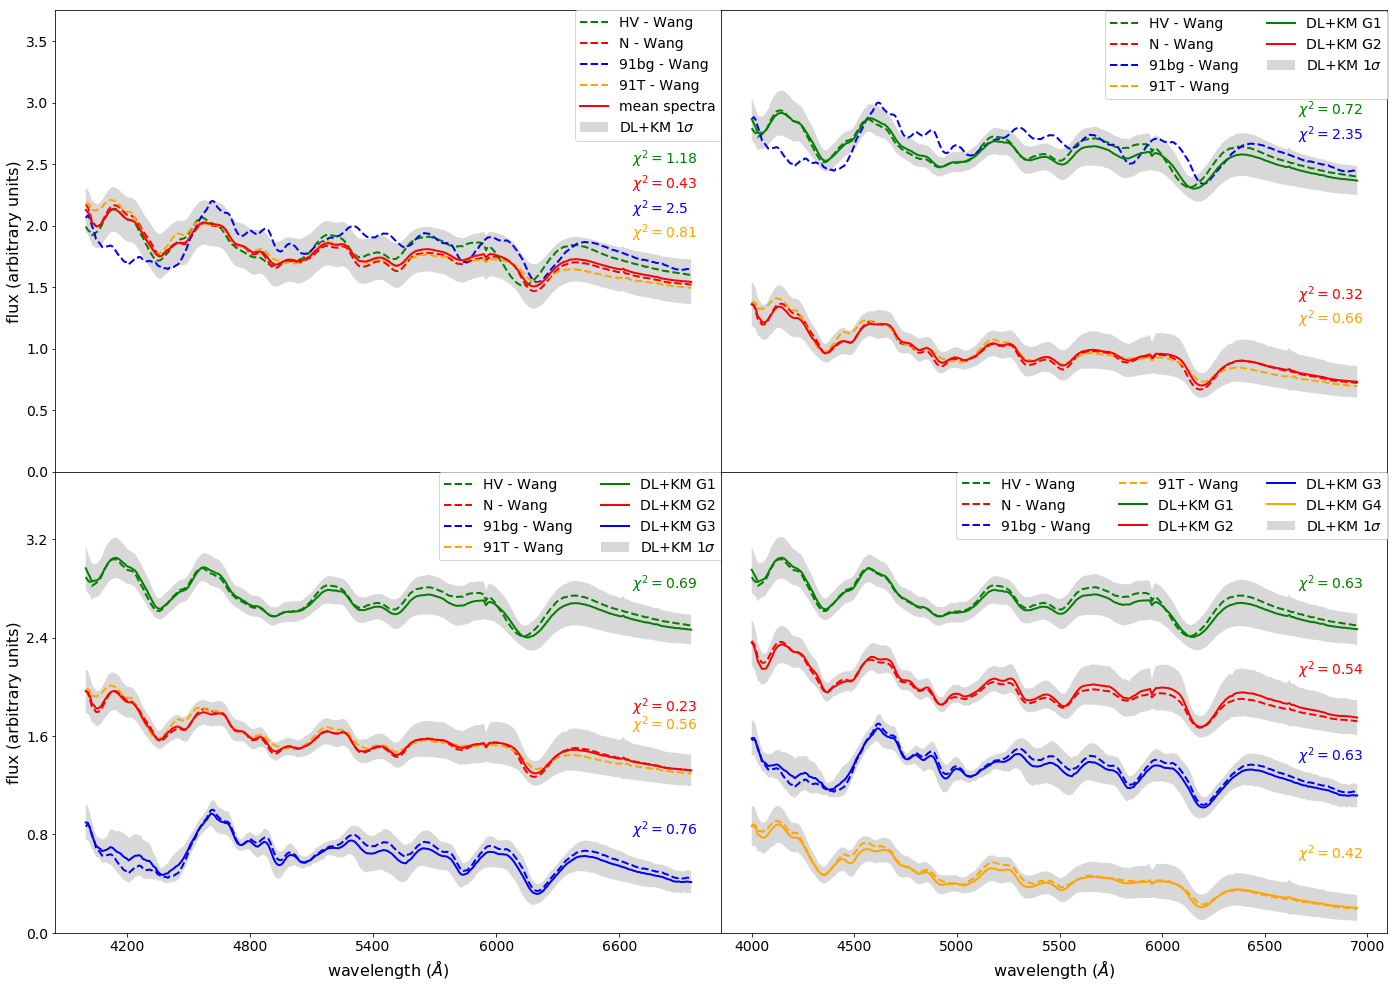

In [363]:
import pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def load_colors(sne_list,type='Wang'):

    import urllib
    import numpy
    
    op1=open('wang_data.txt','r')
    lin1 = op1.readlines()
    op1.close()
    data1 = [elem[:16].split()[0] for elem in lin1[51:]]
    data2 = [elem[41:].split() for elem in lin1[51:]]
    
    for i in range(numpy.shape(data2)[0]):
        if numpy.size(data2[i])==1:
            data2[i]= [ data2[i][0],'nan']
    
    if type=='Wang':
        name_dict={'name':['HV','N','91bg','91T','nan'],
                   'color':['y','g','c','r','b'],
                   'mark':[u"s",u"o",u"2",u"D",u"*"]}

        index=1
    if type=='Branch':
        name_dict={'name':['BL','CN','CL','SS'],
                   'color':['y','g','r','b'],
                   'mark':[u"s",u"o",u"2",u"D"]}
        index=0

    col_=[name_dict['name'],name_dict['color']]
    mark_=[name_dict['name'],name_dict['mark']]
    color_list=[]
    shape_list=[]
    for i in sne_list:
        if i[2:] in data1:
            color_list.append( col_[1][col_[0].index(data2[data1.index(i[2:])][index])])
            shape_list.append(mark_[1][mark_[0].index(data2[data1.index(i[2:])][index])])
        else:
            color_list.append('k')
            shape_list.append(u'x')
    return color_list,shape_list,name_dict
###############################################################################################

# path to DL results
path_small_space = reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# path to original spectra
path_spectra = 'fluxes_all_epochs.dat'

# path to kmeans result 
path_kmeans_4g = 'clustering_KMeans_label_4features_4groups.dat'
path_kmeans_3g = 'clustering_KMeans_label_4features_3groups.dat'
path_kmeans_2g = 'clustering_KMeans_label_4features_2groups.dat'

# read kmeans result 4 groups
op5 = open(path_kmeans_4g, 'r')
lin5 = op5.readlines()
op5.close()

kmeans_classes = [float(elem.split()[0]) for elem in lin5]

# read result 3 groups
kmeans_classes_3g = np.loadtxt(path_kmeans_3g)

# read result 2 groups
kmeans_classes_2g = np.loadtxt(path_kmeans_2g)


# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]
names_max = [names_all[i][0] for i in range(len(names_all)) if names_all[i][-1] == '1']


# read original spectra
op4 = open(path_spectra, 'r')
lin4 = op4.readlines()
op4.close()

data4 = [elem.split() for elem in lin4]

data_spectra = np.array([[float(item) for item in line] for line in data4])

data_max = np.array([data_spectra[i] for i in range(len(data_spectra)) if names_all[i][-1] == '1'])
spectra_mean = np.array([np.mean(data_max[:,j]) for j in range(len(data_max[0]))])
spectra_std = np.array([np.std(data_max[:,j]) for j in range(len(data_max[0]))])


# build wang color code 
color_wang = load_colors(names_max)

# separate groups accorging to wang classification
wang_spectra = []
for cor in color_wang[2]['color'][:-1]:
    spectra_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if color_wang[0][cont - 1] == cor:
                spectra_temp.append(data_spectra[j])
            
    spectra_temp = np.array(spectra_temp)
    wang_spectra.append(spectra_temp)

wang_spectra = np.array(wang_spectra)

spectra_group = []
for j in range(len(wang_spectra)):
    spectra_group.append([np.mean(wang_spectra[j][:,l]) for l in range(len(wang_spectra[j][0]))])

spectra_group = np.array(spectra_group)


# separate groups according to kmeans classification 4 groups
groups_kmeans = []
for item in range(4):
    kmeans_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if kmeans_classes[cont - 1] == item:
                kmeans_temp.append(data_spectra[j])

    groups_kmeans.append(np.array(kmeans_temp))

group_kmeans = np.array(groups_kmeans)
kmeans_rep = [np.array([np.mean(group_kmeans[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans))]
kmeans_std = [np.array([np.std(group_kmeans[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans))]
xaxes = [4000 + 10*ll for ll in range(len(data_spectra[0]))]



# separate groups according to kmeans classification 3 groups
groups_kmeans_3g = []
for item in range(3):
    kmeans_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if kmeans_classes_3g[cont - 1] == item:
                kmeans_temp.append(data_spectra[j])

    groups_kmeans_3g.append(np.array(kmeans_temp))

group_kmeans_3g = np.array(groups_kmeans_3g)
kmeans_rep_3g = [np.array([np.mean(group_kmeans_3g[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans_3g))]
kmeans_std_3g = [np.array([np.std(group_kmeans_3g[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans_3g))]

# separate groups according to kmeans classification 2 groups
groups_kmeans_2g = []
for item in range(2):
    kmeans_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if kmeans_classes_2g[cont - 1] == item:
                kmeans_temp.append(data_spectra[j])

    groups_kmeans_2g.append(np.array(kmeans_temp))

group_kmeans_2g = np.array(groups_kmeans_2g)
kmeans_rep_2g = [np.array([np.mean(group_kmeans_2g[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans_2g))]
kmeans_std_2g = [np.array([np.std(group_kmeans_2g[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans_2g))]


# plot wang and kmeans results
fig2 = plt.figure(figsize=(20, 14))

chi2_HV_1g = round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('HV')][j]-spectra_mean[j])**2 for j in range(len(spectra_mean))])),2)
chi2_N_1g = round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('N')][j]-spectra_mean[j])**2 for j in range(len(spectra_mean))])),2)
chi2_91bg_1g = round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91bg')][j]-spectra_mean[j])**2 for j in range(len(spectra_mean))])),2)
chi2_91T_1g = round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91T')][j]-spectra_mean[j])**2 for j in range(len(spectra_mean))])),2)

ax2 = plt.subplot(2,2,1)
line,  = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('HV')]+1.3, lw=2.0,ls='--', color='green', label='HV - Wang')
line,  = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('N')]+1.3, lw=2.0,ls='--', color='red', label='N - Wang')
line,  = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('91bg')]+1.3, lw=2.0,ls='--', color='blue', label='91bg - Wang')
line,  = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('91T')]+1.3, lw=2.0,ls='--', color='orange', label='91T - Wang')
line, = ax2.plot(xaxes, spectra_mean + 1.3, color='red',lw=2.0, label='mean spectra')
ax2.fill_between(xaxes, spectra_mean - spectra_std[0] + 1.3, spectra_mean + spectra_std[0] + 1.3, facecolor='gray', alpha=0.3, label='DL+KM 1$\sigma$')
ax2.text(6660, 2.5, '$\chi^2 = $' + str(chi2_HV_1g), fontsize=14, color='green')
ax2.text(6660, 2.3, '$\chi^2 = $' + str(chi2_N_1g), fontsize=14, color='red')
ax2.text(6660, 2.1, '$\chi^2 = $' + str(chi2_91bg_1g), fontsize=14, color='blue')
ax2.text(6660, 1.9, '$\chi^2 = $' + str(chi2_91T_1g), fontsize=14, color='orange')
plt.ylabel('flux (arbitrary units)', fontsize=16)
plt.xticks([])
plt.yticks(fontsize=14)
plt.ylim(0, 3.75)
ax2.legend(loc='upper center', bbox_to_anchor=(0.89, 1.0155), ncol=1, fontsize=14)

chi2_HV_2g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('HV')][j]-kmeans_rep_2g[k][j])**2 for j in range(len(kmeans_rep_2g[0]))])),2) for k in range(2)]
chi2_N_2g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('N')][j]-kmeans_rep_2g[k][j])**2 for j in range(len(kmeans_rep_2g[0]))])),2) for k in range(2)]
chi2_91bg_2g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91bg')][j]-kmeans_rep_2g[k][j])**2 for j in range(len(kmeans_rep_2g[0]))])),2) for k in range(2)]
chi2_91T_2g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91T')][j]-kmeans_rep_2g[k][j])**2 for j in range(len(kmeans_rep_2g[0]))])),2) for k in range(2)]


ax3 = plt.subplot(2,2,2)
line, = ax3.plot(xaxes, spectra_group[color_wang[2]['name'].index('HV')]+2.1, lw=2.0, ls='--', color='green', label='HV - Wang')
line,  = ax3.plot(xaxes, spectra_group[color_wang[2]['name'].index('N')]+0.5, lw=2.0,ls='--', color='red', label='N - Wang')
line,  = ax3.plot(xaxes, spectra_group[color_wang[2]['name'].index('91bg')]+2.1, lw=2.0,ls='--', color='blue', label='91bg - Wang')
line,  = ax3.plot(xaxes, spectra_group[color_wang[2]['name'].index('91T')]+0.5, lw=2.0,ls='--', color='orange', label='91T - Wang')
line, = ax3.plot(xaxes, kmeans_rep_2g[0]+2.1, color='green',lw=2.0, label='DL+KM G1')
line, = ax3.plot(xaxes, kmeans_rep_2g[1]+0.5, lw=2.0, color='red', label='DL+KM G2')
ax3.fill_between(xaxes, kmeans_rep_2g[0] - kmeans_std_2g[0] + 2.1, kmeans_rep_2g[0] + kmeans_std_2g[0] + 2.1, facecolor='gray', alpha=0.3, label='DL+KM 1$\sigma$')
ax3.fill_between(xaxes, kmeans_rep_2g[1] - kmeans_std_2g[1]+0.5, kmeans_rep_2g[1] + kmeans_std_2g[1]+0.5, facecolor='gray', alpha=0.3)
ax3.text(6660, 2.9, '$\chi^2 = $' + str(chi2_HV_2g[0]), fontsize=14, color='green')
ax3.text(6660, 1.4, '$\chi^2 = $' + str(chi2_N_2g[1]), fontsize=14, color='red')
ax3.text(6660, 2.7, '$\chi^2 = $' + str(chi2_91bg_2g[0]), fontsize=14, color='blue')
ax3.text(6660, 1.2, '$\chi^2 = $' + str(chi2_91T_2g[1]), fontsize=14, color='orange')
plt.xticks([])
plt.yticks([])
plt.ylim(0, 3.75)
ax3.legend(loc='upper center', bbox_to_anchor=(0.788, 1.014), ncol=2, fontsize=14)

chi2_HV_3g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('HV')][j]-kmeans_rep_3g[k][j])**2 for j in range(len(kmeans_rep_3g[0]))])),2) for k in range(3)]
chi2_N_3g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('N')][j]-kmeans_rep_3g[k][j])**2 for j in range(len(kmeans_rep_3g[0]))])),2) for k in range(3)]
chi2_91T_3g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91T')][j]-kmeans_rep_3g[k][j])**2 for j in range(len(kmeans_rep_3g[0]))])),2) for k in range(3)]
chi2_91bg_3g = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91bg')][j]-kmeans_rep_3g[k][j])**2 for j in range(len(kmeans_rep_3g[0]))])),2) for k in range(3)]

ax2 = plt.subplot(2,2,3)
line, = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('HV')] + 2.2, lw=2.0, ls='--', color='green', label='HV - Wang')
line,  = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('N')] + 1.1, lw=2.0,ls='--', color='red', label='N - Wang')
line, = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('91bg')] + 0.1, lw=2.0, ls='--', color='blue', label='91bg - Wang')
line, = ax2.plot(xaxes, spectra_group[color_wang[2]['name'].index('91T')]+1.1, lw=2.0, ls='--', color='orange', label='91T - Wang')
line, = ax2.plot(xaxes, kmeans_rep_3g[0]+2.2, color='green',lw=2.0, label='DL+KM G1')
line, = ax2.plot(xaxes, kmeans_rep_3g[1]+1.1, lw=2.0, color='red', label='DL+KM G2')
line, = ax2.plot(xaxes, kmeans_rep_3g[2]+0.1, lw=2.0, color='blue', label='DL+KM G3')
ax2.fill_between(xaxes, kmeans_rep_3g[0] - kmeans_std_3g[0] + 2.2, kmeans_rep_3g[0] + kmeans_std_3g[0] + 2.2, facecolor='gray', alpha=0.3, label='DL+KM 1$\sigma$')
ax2.fill_between(xaxes, kmeans_rep_3g[1] - kmeans_std_3g[1] + 1.1, kmeans_rep_3g[1] + kmeans_std_3g[1] + 1.1, facecolor='gray', alpha=0.3)
ax2.fill_between(xaxes, kmeans_rep_3g[2] - kmeans_std_3g[2] + 0.1, kmeans_rep_3g[2] + kmeans_std_3g[2] + 0.1, facecolor='gray', alpha=0.3)
ax2.text(6660, 2.8, '$\chi^2 = $' + str(chi2_HV_3g[0]), fontsize=14, color='green')
ax2.text(6660, 1.8, '$\chi^2 = $' + str(chi2_N_3g[1]), fontsize=14, color='red')
ax2.text(6660, 1.65, '$\chi^2 = $' + str(chi2_91T_3g[1]), fontsize=14, color='orange')
ax2.text(6660, 0.8, '$\chi^2 = $' + str(chi2_91bg_3g[2]), fontsize=14, color='blue')
plt.ylabel('flux (arbitrary units)', fontsize=16)
plt.xlabel('wavelength ($\AA$)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 3.75)
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
ax2.legend(loc='upper center', bbox_to_anchor=(0.788, 1.014), ncol=2, fontsize=14)


chi2_HV = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('HV')][j]-kmeans_rep[k][j])**2 for j in range(len(kmeans_rep[0]))])),2) for k in range(4)]
chi2_N = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('N')][j]-kmeans_rep[k][j])**2 for j in range(len(kmeans_rep[1]))])),2)  for k in range(4)]
chi2_91bg = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91bg')][j]-kmeans_rep[k][j])**2 for j in range(len(kmeans_rep[2]))])),2)  for k in range(4)]
chi2_91T = [round(np.sqrt(sum([(spectra_group[color_wang[2]['name'].index('91T')][j]-kmeans_rep[k][j])**2 for j in range(len(kmeans_rep[3]))])),2)  for k in range(4)]

ax = plt.subplot(2,2,4)
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('HV')]+2.2, lw=2.0, ls='--', color='green', label='HV - Wang')
line,  = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('N')]+1.5, lw=2.0,ls='--', color='red', label='N - Wang')
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('91bg')]+0.8, lw=2.0, ls='--', color='blue', label='91bg - Wang')
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('91T')], lw=2.0, ls='--', color='orange', label='91T - Wang')
line, = ax.plot(xaxes, kmeans_rep[0]+2.2, color='green',lw=2.0, label='DL+KM G1')
line, = ax.plot(xaxes, kmeans_rep[1]+1.5, lw=2.0, color='red', label='DL+KM G2')
line, = ax.plot(xaxes, kmeans_rep[2]+0.8, lw=2.0, color='blue', label='DL+KM G3')
line, = ax.plot(xaxes, kmeans_rep[3], lw=2.0, color='orange', label='DL+KM G4')
ax.fill_between(xaxes, kmeans_rep[0] - kmeans_std[0] + 2.2, kmeans_rep[0] + kmeans_std[0] + 2.2, facecolor='gray', alpha=0.3, label='DL+KM 1$\sigma$')
ax.fill_between(xaxes, kmeans_rep[1] - kmeans_std[1] + 1.5, kmeans_rep[1] + kmeans_std[1] + 1.5, facecolor='gray', alpha=0.3)
ax.fill_between(xaxes, kmeans_rep[2] - kmeans_std[2] + 0.8, kmeans_rep[2] + kmeans_std[2] + 0.8, facecolor='gray', alpha=0.3)
ax.fill_between(xaxes, kmeans_rep[3] - kmeans_std[3], kmeans_rep[3] + kmeans_std[3], facecolor='gray', alpha=0.3)
ax.text(6660, 2.8, '$\chi^2 = $' + str(chi2_HV[0]), fontsize=14, color='green')
ax.text(6660, 2.8-0.7, '$\chi^2 = $' + str(chi2_N[1]), fontsize=14, color='red')
ax.text(6660, 2.8-1.4, '$\chi^2 = $' + str(chi2_91bg[2]), fontsize=14, color='blue')
ax.text(6660, 2.8-2.2, '$\chi^2 = $' + str(chi2_91T[3]), fontsize=14, color='orange')
plt.xlabel('wavelength ($\AA$)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([])
plt.ylim(0, 3.75)
ax.legend(loc='upper center', bbox_to_anchor=(0.6765, 1.015), ncol=3, fontsize=14)

plt.subplots_adjust(left=0.05, right=0.975, top=0.99, bottom=0.075,hspace=0.0,wspace=0.0)
plt.savefig("wang_DL_kmeans_spectra_C2.pdf", format='pdf',dpi=1000)

plt.show()

# dvnsdfklndflbndflkmhnklghmnsf lkjhstrlgkjhi

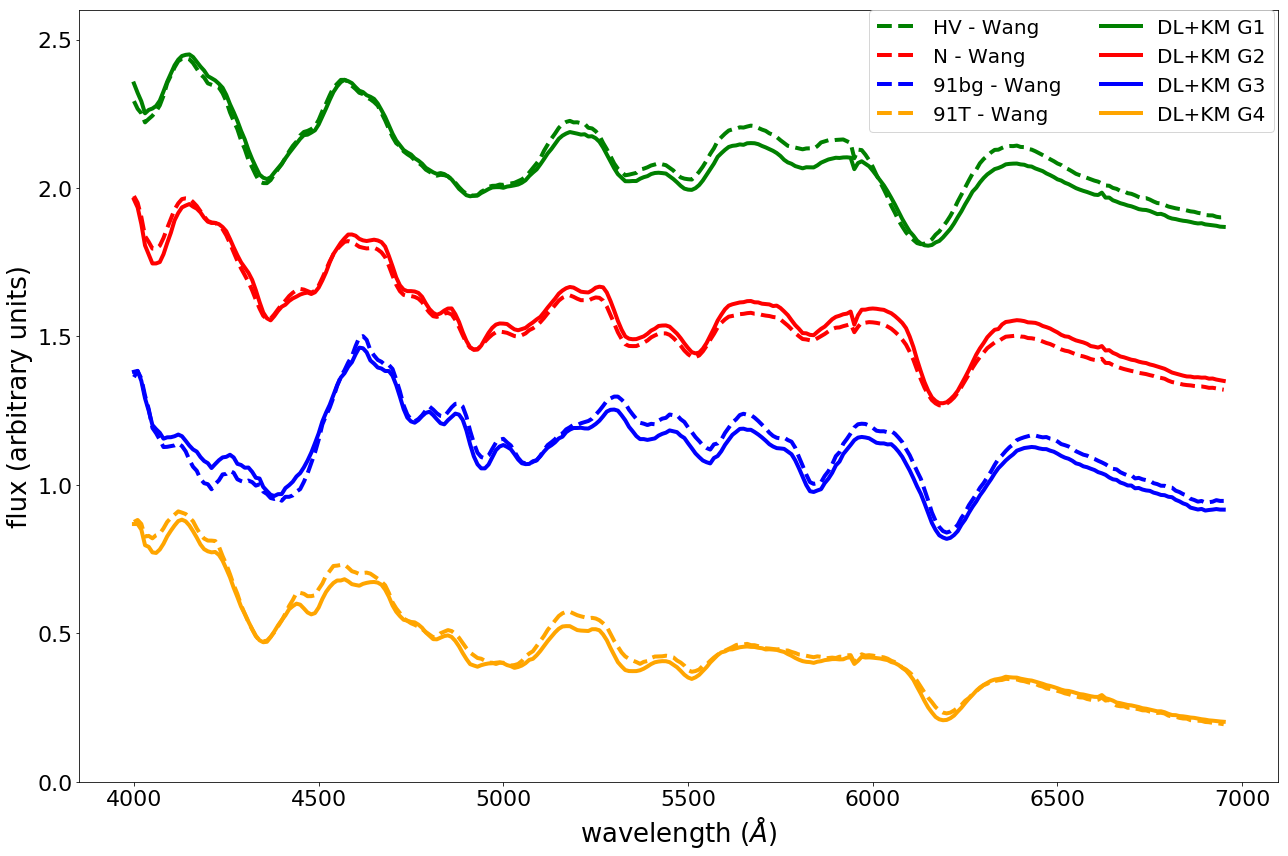

In [366]:
import pylab as plt
import numpy as np

def load_colors(sne_list,type='Wang'):

    import urllib
    import numpy
    
    op1=open('wang_data.txt','r')
    lin1 = op1.readlines()
    op1.close()
    data1 = [elem[:16].split()[0] for elem in lin1[51:]]
    data2 = [elem[41:].split() for elem in lin1[51:]]
    
    for i in range(numpy.shape(data2)[0]):
        if numpy.size(data2[i])==1:
            data2[i]= [ data2[i][0],'nan']
    
    if type=='Wang':
        name_dict={'name':['HV','N','91bg','91T','nan'],
                   'color':['y','g','c','r','b'],
                   'mark':[u"s",u"o",u"2",u"D",u"*"]}

        index=1
    if type=='Branch':
        name_dict={'name':['BL','CN','CL','SS'],
                   'color':['y','g','r','b'],
                   'mark':[u"s",u"o",u"2",u"D"]}
        index=0

    col_=[name_dict['name'],name_dict['color']]
    mark_=[name_dict['name'],name_dict['mark']]
    color_list=[]
    shape_list=[]
    for i in sne_list:
        if i[2:] in data1:
            color_list.append( col_[1][col_[0].index(data2[data1.index(i[2:])][index])])
            shape_list.append(mark_[1][mark_[0].index(data2[data1.index(i[2:])][index])])
        else:
            color_list.append('k')
            shape_list.append(u'x')
    return color_list,shape_list,name_dict
###############################################################################################

# path to DL results
path_small_space = reduced_data4D

# path to spectra ID
path_id = 'spectra_data_id.dat'

# path to original spectra
path_spectra = 'fluxes_all_epochs.dat'

# path to kmeans result 4 groups
path_kmeans_4g = 'clustering_KMeans_label_4features_4groups.dat'

# read kmeans result 4 groups
op5 = open(path_kmeans_4g, 'r')
lin5 = op5.readlines()
op5.close()

kmeans_classes = [float(elem.split()[0]) for elem in lin5]


# read original spectra
op4 = open(path_spectra, 'r')
lin4 = op4.readlines()
op4.close()

data4 = [elem.split() for elem in lin4]

data_spectra = np.array([[float(item) for item in line] for line in data4])

# read spectra ID
op2 = open(path_id, 'r')
lin2 = op2.readlines()
op2.close()

names_all = [elem.split() for elem in lin2[1:]]
names_max = [names_all[i][0] for i in range(len(names_all)) if names_all[i][-1] == '1']

# build wang color code 
color_wang = load_colors(names_max)

# separate groups accorging to wang classification
wang_spectra = []
for cor in color_wang[2]['color'][:-1]:
    spectra_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if color_wang[0][cont - 1] == cor:
                spectra_temp.append(data_spectra[j])
            
    spectra_temp = np.array(spectra_temp)
    wang_spectra.append(spectra_temp)

wang_spectra = np.array(wang_spectra)

spectra_group = []
for j in range(len(wang_spectra)):
    spectra_group.append([np.mean(wang_spectra[j][:,l]) for l in range(len(wang_spectra[j][0]))])

spectra_group = np.array(spectra_group)


# separate groups according to kmeans classification 4 groups
groups_kmeans = []
for item in range(4):
    kmeans_temp = []
    cont = 0
    for j in range(len(data_spectra)):
        if names_all[j][-1] == '1':
            cont = cont + 1
            if kmeans_classes[cont - 1] == item:
                kmeans_temp.append(data_spectra[j])

    groups_kmeans.append(np.array(kmeans_temp))

group_kmeans = np.array(groups_kmeans)
kmeans_rep = [np.array([np.mean(group_kmeans[ll][:,jj]) for jj in range(len(data_spectra[0]))]) for ll in range(len(groups_kmeans))]
xaxes = [4000 + 10*ll for ll in range(len(data_spectra[0]))]

# plot wang and kmeans results
fig2 = plt.figure(figsize=(18,12))
ax = plt.subplot(111)
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('HV')]+1.6, lw=4.0, ls='--', color='green', label='HV - Wang')
line,  = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('N')]+1.1, lw=4.0,ls='--', color='red', label='N - Wang')
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('91bg')]+0.6, lw=4.0, ls='--', color='blue', label='91bg - Wang')
line, = ax.plot(xaxes, spectra_group[color_wang[2]['name'].index('91T')], lw=4.0, ls='--', color='orange', label='91T - Wang')
line, = ax.plot(xaxes, kmeans_rep[0]+1.6, color='green',lw=4.0, label='DL+KM G1')
line, = ax.plot(xaxes, kmeans_rep[1]+1.1, lw=4.0, color='red', label='DL+KM G2')
line, = ax.plot(xaxes, kmeans_rep[2]+0.6, lw=4.0, color='blue', label='DL+KM G3')
line, = ax.plot(xaxes, kmeans_rep[3], lw=4.0, color='orange', label='DL+KM G4')
plt.xlabel('wavelength ($\AA$)', fontsize=26)
plt.ylabel('flux (arbitrary units)', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.ylim(0, 2.6)
ax.legend(loc='upper center', bbox_to_anchor=(0.8275, 1.013), ncol=2, fontsize=20)
plt.savefig("wang_DL_kmeans_spectra.pdf", format='pdf',dpi=1000)

plt.show()